# PROJECT DATATI, 2023-2024 DATA VISUALIZATION &TEXT MINING

## WNUT17: PREDICTION OF IOB-TAGS

### Elisabetta Rebecchi, Luca Battistella,  Simone Dal Ben, Rocco Andrea D'Alterio

## Packages

In [128]:
#!pip install matplotlib pandas numpy openpyxl==3.0.9 seaborn wordcloud nltk folium
# import folium
# !pip install spacy
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import spacy
from nltk.tokenize import word_tokenize
import matplotlib.patches as mpatches
import re
import urllib
import sklearn
import logging
import os
import numpy as np
from seqeval.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import kerasutils
import dataio
import modelutils
# from utils import kerasutils, dataio, modelutils

# Introduction

In this project we analyze the dataset for the WNUT 17 Emerging Entities task [This is the link](https://github.com/nluninja/nlp_datasets/tree/main/WNUT17/data). It contains text from Twitter, Stack Overflow responses, YouTube comments, and Reddit comments.
We use the two dataset 'train' and 'test' for computing the analysis. Both of them are in the IOB format (inside, outside, beginning). It is a common tagging format for tagging tokens in a chunking task in computational linguistics, or named entity recognition in NLP.  
- The I- prefix before a tag indicates that the tag is inside a chunk. 
- An O tag indicates that a token belongs to no chunk. 
- The B- prefix before a tag indicates that the tag is the beginning of a chunk that immediately follows another chunk without O tags between them.

Goals of Our Work:
- Comprehensive Data Analysis: Our primary goal was to perform a comprehensive analysis of the WNUT 17 by utilizing both the 'train' and 'test' datasets formatted in the IOB tagging format, we aimed to dig deeply into the the textual content, understanding the distribution of entities.
- Data Preprocessing and Cleaning: A fundamental aspect of our work involved data preprocessing and cleaning. This step was crucial to ensure the removal of noise, inconsistencies, and irrelevant information from the datasets.
- Exploratory Data Analysis : Through exploratory data analysis, we proceeded to uncover insightful patterns and characteristics within the datasets. Utilizing powerful visualization tools, our objective was to provide a visual representation of the distribution and moreover.
- Development and Evaluation of LSTM: we embarked on the development and evaluation of the LSTM model, tailored to perform the task of named entity recognition (NER) or chunking based on the IOB-tagged data.
- Integration of Transformer-Based Models:  we entered into the world of Transformer-based models by implementing BERT.
- Comparative Analysis and Insights: the last aspect of our work was comparing the performance, strengths, and limitations of various approaches.

# Data Exploratory Analysis

## Data Storing

In this section we upload the two dataset train and test, the first one is in the .conll format, while the second one is .annotated. We obtained two lists of tuples, where each word was associated to an IOB tag, we transform these lists into two different tokenized dataframes. After doing that, we concatenated the two dataframes in order to obtain a unique one with all the words and IOB tags stored. In this way we obtained a dataframe with shape: 90805 rows and 2 columns.

In [129]:
# Create an empty list to store the data
data_train = []

# Open the file in read mode
with open('./wnut17train.conll', 'r') as file:
    lines = file.readlines()  # Read all the lines from the file

# Treat each line as a potential pair of words and tags
for line in lines:
    parts = line.strip().split("\t")

    if len(parts) == 2:
        word = parts[0]
        tag = parts[1]
        data_train.append((word, tag))

    # If you want to preserve empty lines, you can simply append them like this:
    else:
        data_train.append(('', ''))


In [130]:
print(data_train)

[('@paulwalk', 'O'), ('It', 'O'), ("'s", 'O'), ('the', 'O'), ('view', 'O'), ('from', 'O'), ('where', 'O'), ('I', 'O'), ("'m", 'O'), ('living', 'O'), ('for', 'O'), ('two', 'O'), ('weeks', 'O'), ('.', 'O'), ('Empire', 'B-location'), ('State', 'I-location'), ('Building', 'I-location'), ('=', 'O'), ('ESB', 'B-location'), ('.', 'O'), ('Pretty', 'O'), ('bad', 'O'), ('storm', 'O'), ('here', 'O'), ('last', 'O'), ('evening', 'O'), ('.', 'O'), ('', ''), ('From', 'O'), ('Green', 'O'), ('Newsfeed', 'O'), (':', 'O'), ('AHFA', 'B-group'), ('extends', 'O'), ('deadline', 'O'), ('for', 'O'), ('Sage', 'O'), ('Award', 'O'), ('to', 'O'), ('Nov', 'O'), ('.', 'O'), ('5', 'O'), ('http://tinyurl.com/24agj38', 'O'), ('', ''), ('Pxleyes', 'B-corporation'), ('Top', 'O'), ('50', 'O'), ('Photography', 'O'), ('Contest', 'O'), ('Pictures', 'O'), ('of', 'O'), ('August', 'O'), ('2010', 'O'), ('...', 'O'), ('http://bit.ly/bgCyZ0', 'O'), ('#photography', 'O'), ('', ''), ('today', 'O'), ('is', 'O'), ('my', 'O'), ('last',

In [131]:
# downloading the pre-trained models and data required for tokenization using the Punkt algorithm.
nltk.download('punkt') 

# Tokenize the text within each tuple
tokenized_dataset_train = [(word_tokenize(word), iob_tag) for word, iob_tag in data_train]

# Print the tokenized dataset
for words, iob_tag in tokenized_dataset_train:
    print(words, iob_tag)

[nltk_data] Downloading package punkt to /Users/batti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['@', 'paulwalk'] O
['It'] O
["'s"] O
['the'] O
['view'] O
['from'] O
['where'] O
['I'] O
["'m"] O
['living'] O
['for'] O
['two'] O
['weeks'] O
['.'] O
['Empire'] B-location
['State'] I-location
['Building'] I-location
['='] O
['ESB'] B-location
['.'] O
['Pretty'] O
['bad'] O
['storm'] O
['here'] O
['last'] O
['evening'] O
['.'] O
[] 
['From'] O
['Green'] O
['Newsfeed'] O
[':'] O
['AHFA'] B-group
['extends'] O
['deadline'] O
['for'] O
['Sage'] O
['Award'] O
['to'] O
['Nov'] O
['.'] O
['5'] O
['http', ':', '//tinyurl.com/24agj38'] O
[] 
['Pxleyes'] B-corporation
['Top'] O
['50'] O
['Photography'] O
['Contest'] O
['Pictures'] O
['of'] O
['August'] O
['2010'] O
['...'] O
['http', ':', '//bit.ly/bgCyZ0'] O
['#', 'photography'] O
[] 
['today'] O
['is'] O
['my'] O
['last'] O
['day'] O
['at'] O
['the'] O
['office'] O
['.'] O
[] 
['4Dbling'] B-person
["'s"] O
['place'] O
['til'] O
['monday'] O
[','] O
['party'] O
['party'] O
['party'] O
['.'] O
['&', 'lt', ';'] O
['3'] O
[] 
['watching'] O
['t

['face'] O
['!'] O
['I'] O
['have'] O
['been'] O
['tanning'] O
['myself'] O
['this'] O
['month'] O
[','] O
['hurry'] O
['up'] O
['summer'] O
['!'] O
[] 
['Can'] O
['your'] O
['CMS'] O
['guarantee'] O
['pixel-precise'] O
['output'] O
['when'] O
['compared'] O
['to'] O
['our'] O
['MS-Paint'] O
['designs'] O
['?'] O
['#', 'cmsretractions'] O
[] 
['@', 'endlesskies'] O
['ik'] O
['me'] O
['2'] O
['.'] O
['At'] O
['night'] O
['I', "'m"] O
['wide'] O
['awake'] O
['but'] O
['the'] O
['daytime'] O
[','] O
['I', "'m"] O
['so'] O
['tired'] O
['my'] O
['day'] O
['drags'] O
[] 
['@', 'peterc83'] O
['night'] O
['night'] O
['good'] O
['luck'] O
['tomorrow'] O
['x'] O
[] 
['it'] O
["'s"] O
['friday'] O
['it'] O
["'s"] O
['friday'] O
['i', "'m"] O
['so'] O
['happy'] O
['it'] O
["'s"] O
['friday'] O
[':', ':'] O
['whooo'] O
['yooo'] O
['doing'] O
['dance'] O
['and'] O
['takin'] O
['a'] O
['chance'] O
['la'] O
['la'] O
['la'] O
['lalala'] O
[':', ':'] O
[] 
['@', 'Mayuko_115'] O
['You', "'re"] O
['welcom

In [132]:
# Create a DataFrame from a list of tuples
df_train = pd.DataFrame(data_train, columns = ["Word", "IOB_Tag"])

# Print the DataFrame
print(df_train.head(30))

         Word     IOB_Tag
0   @paulwalk           O
1          It           O
2          's           O
3         the           O
4        view           O
5        from           O
6       where           O
7           I           O
8          'm           O
9      living           O
10        for           O
11        two           O
12      weeks           O
13          .           O
14     Empire  B-location
15      State  I-location
16   Building  I-location
17          =           O
18        ESB  B-location
19          .           O
20     Pretty           O
21        bad           O
22      storm           O
23       here           O
24       last           O
25    evening           O
26          .           O
27                       
28       From           O
29      Green           O


In [133]:
# Let's repeat the same procedure used for the train data with the test data
data_test = []

with open('./emerging.test.annotated', 'r', encoding = 'utf-8') as file:
    lines = file.readlines()  # Leggi tutte le linee del file
    
for line in lines:
    parts = line.strip().split("\t")

    if len(parts) == 2:
        word = parts[0]
        tag = parts[1]
        data_test.append((word, tag))

    else:
        data_test.append(('', ''))


In [134]:
print(data_test)

[('&', 'O'), ('gt', 'O'), (';', 'O'), ('*', 'O'), ('The', 'O'), ('soldier', 'O'), ('was', 'O'), ('killed', 'O'), ('when', 'O'), ('another', 'O'), ('avalanche', 'O'), ('hit', 'O'), ('an', 'O'), ('army', 'O'), ('barracks', 'O'), ('in', 'O'), ('the', 'O'), ('northern', 'O'), ('area', 'O'), ('of', 'O'), ('Sonmarg', 'B-location'), (',', 'O'), ('said', 'O'), ('a', 'O'), ('military', 'O'), ('spokesman', 'O'), ('.', 'O'), ('', ''), ('&', 'O'), ('gt', 'O'), (';', 'O'), ('*', 'O'), ('Police', 'O'), ('last', 'O'), ('week', 'O'), ('evacuated', 'O'), ('80', 'O'), ('villagers', 'O'), ('from', 'O'), ('Waltengoo', 'B-location'), ('Nar', 'I-location'), ('where', 'O'), ('dozens', 'O'), ('were', 'O'), ('killed', 'O'), ('after', 'O'), ('a', 'O'), ('series', 'O'), ('of', 'O'), ('avalanches', 'O'), ('hit', 'O'), ('the', 'O'), ('area', 'O'), ('in', 'O'), ('2005', 'O'), ('in', 'O'), ('the', 'O'), ('south', 'O'), ('of', 'O'), ('the', 'O'), ('territory', 'O'), ('.', 'O'), ('', ''), ('&', 'O'), ('gt', 'O'), (';'

In [135]:
tokenized_dataset_test = [(word_tokenize(word), iob_tag) for word, iob_tag in data_test]

for words, iob_tag in tokenized_dataset_test:
    print(words, iob_tag)

['&'] O
['gt'] O
[';'] O
['*'] O
['The'] O
['soldier'] O
['was'] O
['killed'] O
['when'] O
['another'] O
['avalanche'] O
['hit'] O
['an'] O
['army'] O
['barracks'] O
['in'] O
['the'] O
['northern'] O
['area'] O
['of'] O
['Sonmarg'] B-location
[','] O
['said'] O
['a'] O
['military'] O
['spokesman'] O
['.'] O
[] 
['&'] O
['gt'] O
[';'] O
['*'] O
['Police'] O
['last'] O
['week'] O
['evacuated'] O
['80'] O
['villagers'] O
['from'] O
['Waltengoo'] B-location
['Nar'] I-location
['where'] O
['dozens'] O
['were'] O
['killed'] O
['after'] O
['a'] O
['series'] O
['of'] O
['avalanches'] O
['hit'] O
['the'] O
['area'] O
['in'] O
['2005'] O
['in'] O
['the'] O
['south'] O
['of'] O
['the'] O
['territory'] O
['.'] O
[] 
['&'] O
['gt'] O
[';'] O
['*'] O
['The'] O
['army'] O
['on'] O
['Thursday'] O
['recovered'] O
['the'] O
['bodies'] O
['of'] O
['ten'] O
['of'] O
['its'] O
['men'] O
['who'] O
['were'] O
['killed'] O
['in'] O
['an'] O
['avalanche'] O
['the'] O
['previous'] O
['day'] O
['.'] O
[] 
['&'] 

In [136]:
df_test= pd.DataFrame(data_test, columns = ["Word", "IOB_Tag"])

print(df_test.tail(30))

               Word   IOB_Tag
24651        unless         O
24652       Holiday  B-person
24653           has         O
24654             a         O
24655           big         O
24656          game         O
24657           and         O
24658            we         O
24659           hit         O
24660       jumpers         O
24661                        
24662             @  B-person
24663  KenyeahMonae  I-person
24664            It         O
24665             '         O
24666             s         O
24667            my         O
24668        school         O
24669         fault         O
24670             ,         O
24671          girl         O
24672          they         O
24673       cutting         O
24674            up         O
24675          with         O
24676          this         O
24677         dress         O
24678          code         O
24679             😂         O
24680                        


In [137]:
# Concatenating the two DataFrames
df_tot = pd.concat([df_train, df_test], ignore_index = True)

# Converting the words to lowercase in the "Word" column
df_tot['Word'] = df_tot['Word'].str.lower()

# Displaying the concatenated DataFrame
print(df_tot)
len(df_tot)

            Word IOB_Tag
0      @paulwalk       O
1             it       O
2             's       O
3            the       O
4           view       O
...          ...     ...
90800       this       O
90801      dress       O
90802       code       O
90803          😂       O
90804                   

[90805 rows x 2 columns]


90805

## Data information

We aim to analyze the information associated with our dataframe to understand what we are facing. Initially, we verify if the sum of the dimensions of the two dataframes (train and test) equals the dimensions of the complete dataset (total), ensuring the proper merging of the two datasets.

In [138]:
print(df_train.shape)
print(df_test.shape)
print(df_tot.shape)

(66124, 2)
(24681, 2)
(90805, 2)


The sum of the dimensions coincide!

In [139]:
print(df_tot.describe())

         Word IOB_Tag
count   90805   90805
unique  16387      14
top                 O
freq     4681   81224


Here we visualize the different types of labels we have in the IOB_Tag column of the dataframe. This information will be useful for next steps.

In [140]:
unique_iob_tags = df_tot['IOB_Tag'].unique()
print(unique_iob_tags)

['O' 'B-location' 'I-location' '' 'B-group' 'B-corporation' 'B-person'
 'B-creative-work' 'B-product' 'I-person' 'I-creative-work'
 'I-corporation' 'I-group' 'I-product']


## Data Cleaning

We start cleaning our dataset by checking for null values. Since we didn't have any of them, we move on deleting all the stopwords we have in order to reduce the dimension of our dataset without losing any important information from it.


In [141]:
print(df_tot.isnull().sum())

Word       0
IOB_Tag    0
dtype: int64


There are no null values in the dataframe.

In [142]:
# Downloading stopwords
nltk.download('stopwords')

# Saving all stopwords in a variable
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(word):
    if word in stop_words:
        return None
    else:
        return word

[nltk_data] Downloading package stopwords to /Users/batti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
# Adding others stopwords
words_add = ["s", "t", "rt", "co", "http", "https", "www","u", "i'm", "'s", "'m", "'re", "'ve", "amp", "lol",
            "com", "lt", "ly", 'lol', 'omg', 'haha', 'yolo', 'rofl', 'lmao', 'brb', 'btw', 'tbh', 'imo', 'imho',
             'irl', 'fomo', 'bff', 'ootd', 'ootn', 'ootw', 'fwiw', 'fomo', 'smh', 'af',
             'fbf', 'wcw', 'mcm', 'omg', 'haha', 'yolo', 'rofl', 'lmao', "get", "got", "you're"]

for word in words_add:
    stop_words.add(word)
print(stopwords)

<WordListCorpusReader in '/Users/batti/nltk_data/corpora/stopwords'>


In [144]:
len(stop_words)

219

In [145]:
# Copying the original df_tot to another dataFrame df_no_stopwords
df_no_stopwords = df_tot.copy()

# Applying the function to the DataFrame
df_no_stopwords['Word'] = df_no_stopwords['Word'].apply(remove_stopwords)

# Removing rows where stopwords have been detected and replaced with None
df_no_stopwords.dropna(subset = ['Word'], inplace = True, ignore_index = True)

# Removing from the total dataframe all different types of text identified by the following pattern
# @\w+: words starting with '@' followed by one or more alphanumeric characters
# ^[\W_]+$: strings composed solely of non-alphanumeric characters and/or underscore characters
# http:\S+|https:\S+: links that start with 'http:' or 'https:', followed by one or more non-space characters
pattern = r'@\w+|^[\W_]+$|http:\S+|https:\S+'

#Applying the filter using the `str.contains()` method in Pandas
df_cleaned = df_no_stopwords[~df_no_stopwords['Word'].str.contains(pattern)].reset_index(drop = True)

print(df_cleaned)

          Word     IOB_Tag
0         view           O
1       living           O
2          two           O
3        weeks           O
4       empire  B-location
...        ...         ...
45274     girl           O
45275  cutting           O
45276    dress           O
45277     code           O
45278                     

[45279 rows x 2 columns]


# Data visualization

In this section we try to give a visual representazion of our data. First of all we create a **word cloud** of our text dataset superimposing the words onto a mask of a famous bird. Word clouds work in a simple way: the more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.

Then, we plot a **waffle chart** that represents the proportions of different IOB tags in our dataset. We have seen that 89% of the IOB tags were 'O', so we decided to delete them in order to have a better visualization.

In [146]:
def create_wordcloud(text, stopwords, width=800, height=400, background_color='white'):

    # Add some stopwords to the default ones
    if stopwords is None:
        stopwords = set(STOPWORDS)
    else:
        stopwords = set(STOPWORDS).union(stopwords)

    # Create the Word Cloud
    wordcloud = WordCloud(width = width, mask = twitter_mask, height=height, background_color=background_color, stopwords=stop_words).generate(text)
    
    # Visualize the Word Cloud 
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

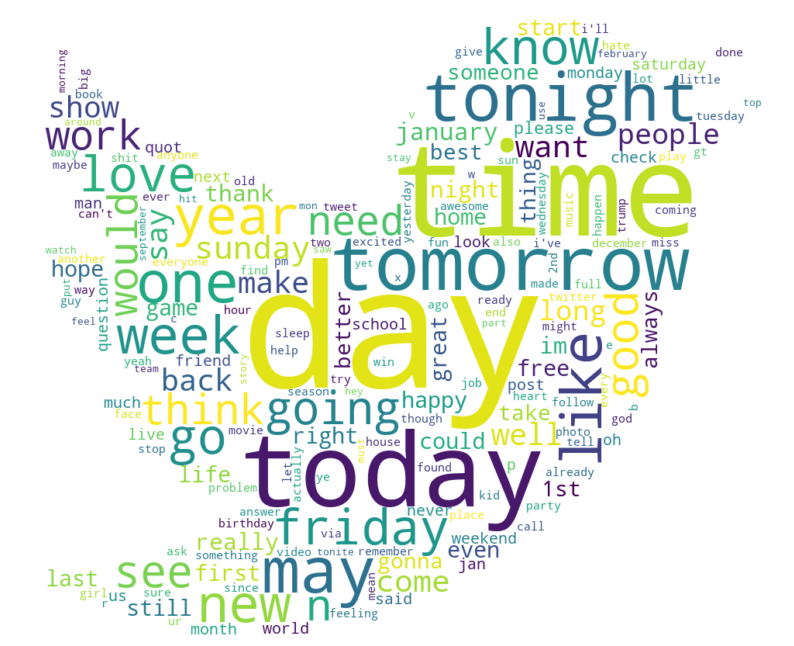

In [147]:
# Convert the "Word" column in a single string by joining all the words
text_train = ' '.join(df_cleaned['Word'])

twitter_mask = np.array(Image.open('twitter_image.png'))  # Select a mask to show the most frequent words

create_wordcloud(text_train, stopwords = stop_words, background_color = 'white') 

As we can see from the word cloud, the five most frequent words are: 'day', 'today', 'time', 'tonight', 'tomorrow'.

Now we compute some operations to construct the waffle chart.

In [148]:
df_no_spaces = df_cleaned.copy() #We create a copy of the df_cleaned dataset

In [149]:
# Identify the rows with empty values.
empty_row_indexes = df_no_spaces[df_no_spaces.apply(lambda row: all(row == ''), axis = 1)].index

# Remove the rows with empty values.
df_no_spaces = df_no_spaces.drop(empty_row_indexes)

# Reset the indices.
df_no_spaces = df_no_spaces.reset_index(drop = True)

print(df_no_spaces) 
# Now, our dataframe without stopwords and spaces has a size of 40,598 rows and 2 columns.

          Word     IOB_Tag
0         view           O
1       living           O
2          two           O
3        weeks           O
4       empire  B-location
...        ...         ...
40593    fault           O
40594     girl           O
40595  cutting           O
40596    dress           O
40597     code           O

[40598 rows x 2 columns]


In [150]:
# Calculate the proportion of IOB tags.
iob_tag_counts = df_no_spaces['IOB_Tag'].value_counts()

In [151]:
# Compute the proportion of each category with respect to the total
category_proportions = iob_tag_counts / (len(df_no_spaces))

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

Category Proportion
IOB_Tag                             
O                           0.888911
B-person                    0.026307
B-location                  0.016232
I-person                    0.010887
B-group                     0.009877
I-creative-work             0.007858
I-location                  0.007365
I-product                   0.007143
B-corporation               0.006971
B-product                   0.006527
B-creative-work             0.005813
I-group                     0.004680
I-corporation               0.001429

Since we can see that the "O" is the label with the biggest proportion (89%) and it should alterate the results of our waffle chart, we decided to delete it in order to visualise the proportion between the different "I-" and "B-" labels. This should results in a more balanced proportion between these tags.

In [152]:
width = 45 # width of chart
height = 15 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 675.


In [153]:
#Remove the words associated with the 'O' letter as their IOB_Tag.
#Remove the rows with 'O' as the value of the IOB_Tag.
df_no_O = df_no_spaces[df_no_spaces['IOB_Tag'] != 'O']

# Calculate the proportion of the remaining IOB tags.
iob_tag_counts_no_O = df_no_O['IOB_Tag'].value_counts()  # calculate the proportion of each category relative to the total.
category_proportions_no_O = iob_tag_counts_no_O / len(df_no_O)

# Print the updated proportions.
print(pd.DataFrame({"Category Proportion (without 'O')": category_proportions_no_O}))

                 Category Proportion (without 'O')
IOB_Tag                                           
B-person                                  0.236807
B-location                                0.146120
I-person                                  0.098004
B-group                                   0.088914
I-creative-work                           0.070732
I-location                                0.066297
I-product                                 0.064302
B-corporation                             0.062749
B-product                                 0.058758
B-creative-work                           0.052328
I-group                                   0.042129
I-corporation                             0.012860


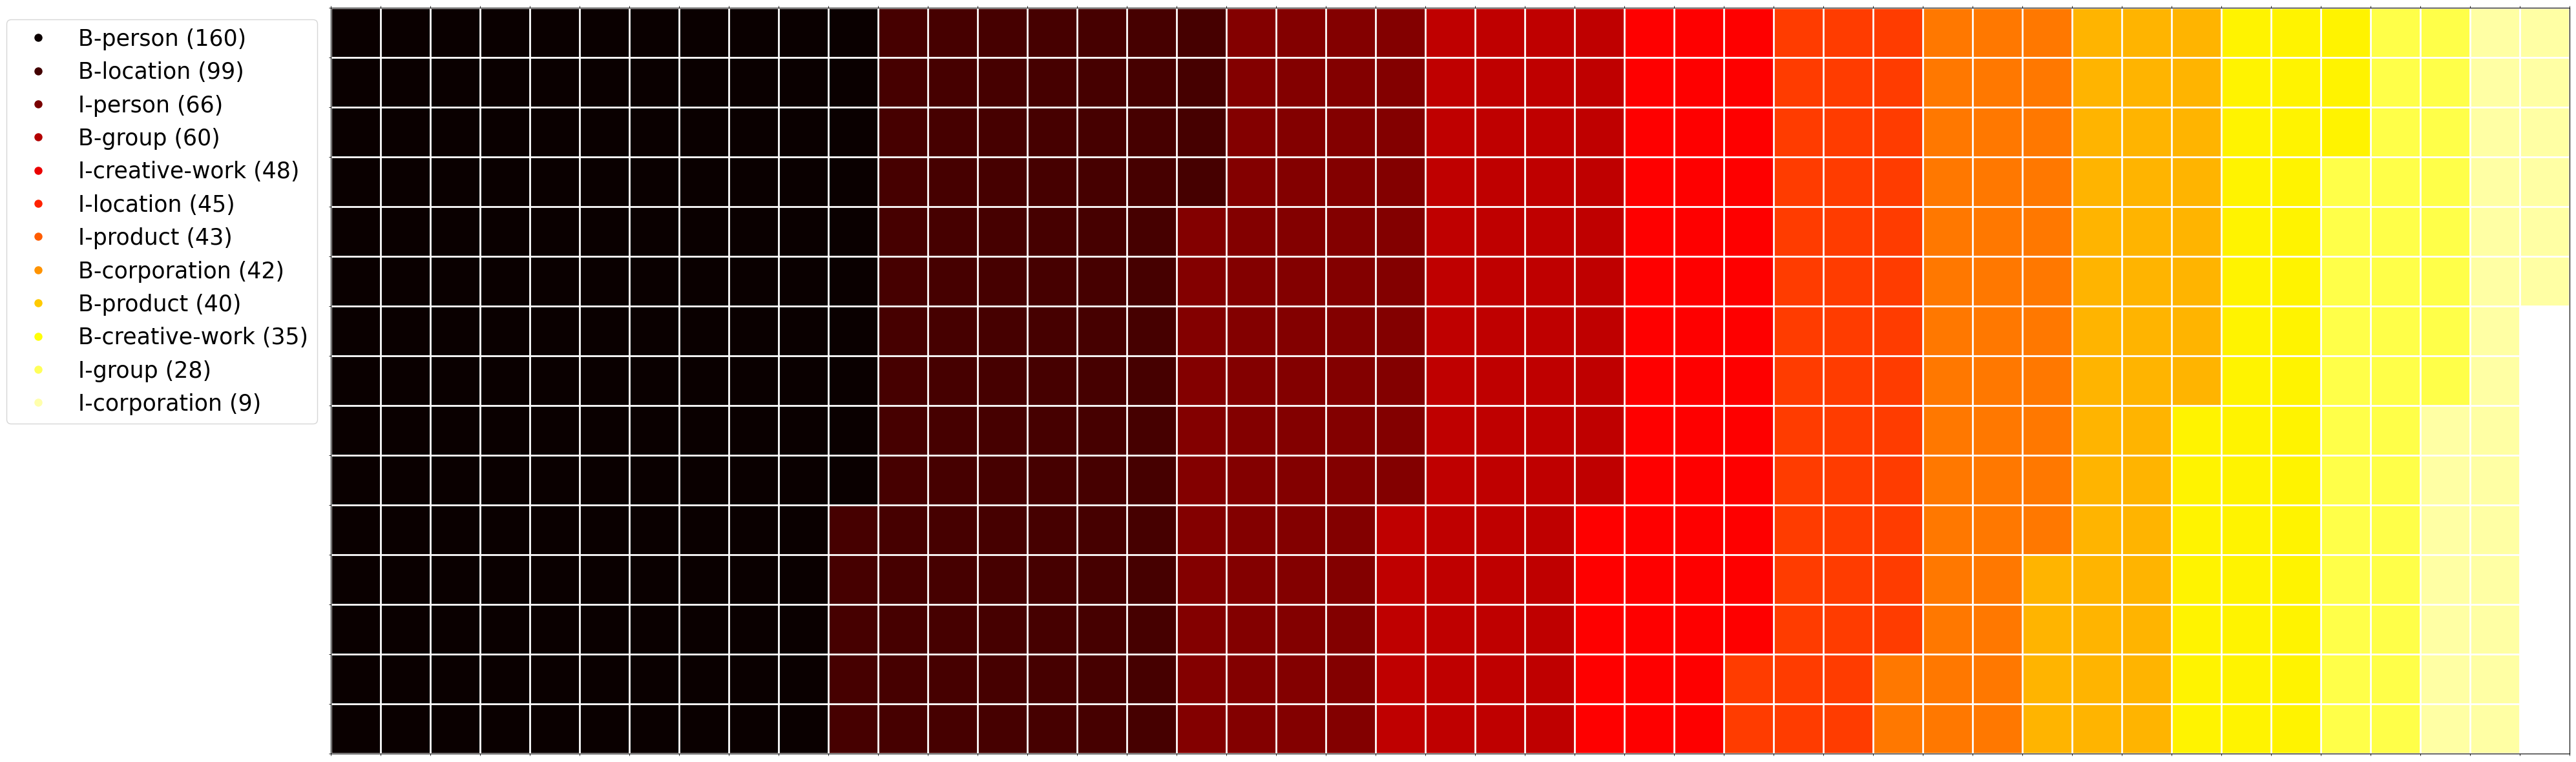

In [154]:
def create_waffle_chart(data, width, height, colormap):
    
    data['tiles'] = (data['count'] / np.array(data['count']).sum() * total_num_tiles).astype(int)
    category_labels = data['IOB_Tag']
    legend_labels = [f"{category} ({count})" for category, count in zip(data['IOB_Tag'], data['count'])]

    waffle_chart = np.zeros((height, width))
    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(data['tiles'][:category_index + 1]):
                category_index += 1

            waffle_chart[row, col] = category_index

    fig, ax = plt.subplots(figsize=(width, height))  # Dimension of the graph
    cax = ax.matshow(waffle_chart, cmap=colormap)
   
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # Mapping colours for different categories
    color_mapping = {category: colormap(i / len(category_labels)) for i, category in enumerate(category_labels)}
    
    # Associates colours to real labels in order to create the legend
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{category} ({data["count"][i]})',
                                markerfacecolor=color_mapping[category], markersize=10)
                      for i, category in enumerate(category_labels)]
    
    # Add the legend on the left of the graph
    plt.legend(handles = legend_handles, loc='upper left', bbox_to_anchor=(-0.15, 1), prop={'size': 25})

    plt.show()

# Data
data_waffle = {'IOB_Tag': ['B-person', 'B-location', 'I-person', 'B-group', 'I-creative-work',
                    'I-location', 'I-product', 'B-corporation', 'B-product', 'B-creative-work',
                    'I-group', 'I-corporation'],
        'count': [160, 99, 66, 60, 48, 45, 43, 42, 40, 35, 28, 9]}

# Parameters of Waffle Chart
width = 45
height = 15
colormap = plt.cm.hot 

# Creating the Waffle Chart
create_waffle_chart(data_waffle, width, height, colormap)

The waffle chart has been successfully generated. On the left side, the legend displays IOB tags (excluding 'O') arranged in decreasing order from top to bottom, with the corresponding number of tiles in parentheses. On the right, the graphical representation vividly illustrates the various proportions utilizing the 'hot' colormap.

We are now able to iterate through all the words of our dataframe to reconstruct the complete sentences. The different sentences are divided by blank lines that are not considered as null values. We do this for computing the histogram of sentences' length.

In [155]:
# Initialize a list to contain the sentences.
sentences_tot = []

# Initialize a variable for the current sentence.
current_sentence_tot = []

# Iterate through the rows of the DataFrame.
for index, row in df_cleaned.iterrows():
    word = row['Word']

    # Check if the row is empty, indicating the end of a sentence.
    if word.strip() == '':
        if current_sentence_tot:
            sentences_tot.append(current_sentence_tot)
            current_sentence_tot = []
    else:
        current_sentence_tot.append(word)

# Add the last sentence to the list (if it exists).
if current_sentence_tot:
    sentences_tot.append(current_sentence_tot)

# Print the sentences.
for i, sentence in enumerate(sentences_tot):
    print(f"Sentence {i + 1}: {' '.join(sentence)}")

Sentence 1: view living two weeks empire state building esb pretty bad storm last evening
Sentence 2: green newsfeed ahfa extends deadline sage award nov 5
Sentence 3: pxleyes top 50 photography contest pictures august 2010 #photography
Sentence 4: today last day office
Sentence 5: 4dbling place til monday party party party &lt; 3
Sentence 6: watching vma pre-show n't even good show first time bored
Sentence 7: 27 followers 30 followers goal today
Sentence 8: 2nd hospital ive today ive seen doctor older version justin
Sentence 9: friday night eats
Sentence 10: gotta dress london fashion week party style
Sentence 11: whispering cause may 1 many vodka last night lil fragile hold
Sentence 12: #nfl week 2 picks blog website
Sentence 13: like songs drinks
Sentence 14: asked question ask fucking donuts donut nice day :p
Sentence 15: every year bestfriend yo ass trouble smdh #doinme
Sentence 16: hate people write drunk status'. must great time sat writing facebook
Sentence 17: tru tru leavin 

In [156]:
# Create a new DataFrame with a column for the sentences.
df_sentences_tot = pd.DataFrame({'Sentences': [' '.join(sentence) for sentence in sentences_tot]})
df_sentences_tot

Sentences
0     view living two weeks empire state building es...
1     green newsfeed ahfa extends deadline sage awar...
2     pxleyes top 50 photography contest pictures au...
3                                 today last day office
4     4dbling place til monday party party party &lt; 3
...                                                 ...
4641  ioverthoughts like looking cute like wearing x...
4642                tybrokesign talk plot twist lmaoooo
4643                    ff add us repost add atccfoodie
4644  cousins today pelicans offence could horrible ...
4645  kenyeahmonae school fault girl cutting dress code

[4646 rows x 1 columns]

We store all the sentences we obtained in a dataframe, obtaining a dataframe with dimension: 4646 rows and 1 columns.

We aim to extract information related to the obtained sentences, specifically focusing on the length of each sentence. Additionally, we seek general statistics regarding the number of words in each sentence, including mean, minimum, and maximum values. 

In [157]:
# Count the words in the sentences.
df_sentences_tot['words_count'] =  df_sentences_tot['Sentences'].apply((lambda x: len(x.split())))
df_sentences_tot

Sentences  words_count
0     view living two weeks empire state building es...           13
1     green newsfeed ahfa extends deadline sage awar...            9
2     pxleyes top 50 photography contest pictures au...            9
3                                 today last day office            4
4     4dbling place til monday party party party &lt; 3            9
...                                                 ...          ...
4641  ioverthoughts like looking cute like wearing x...            8
4642                tybrokesign talk plot twist lmaoooo            5
4643                    ff add us repost add atccfoodie            6
4644  cousins today pelicans offence could horrible ...           13
4645  kenyeahmonae school fault girl cutting dress code            7

[4646 rows x 2 columns]

In [158]:
df_sentences_tot['words_count'].describe()

count    4646.000000
mean        8.738269
std         4.646230
min         1.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        53.000000
Name: words_count, dtype: float64

Now we intend to identify and read the longest sentence in the dataset and determine its position within the dataframe.

In [159]:
max_words_row = df_sentences_tot[df_sentences_tot['words_count'] == df_sentences_tot['words_count'].max()]

# Print the sentence with the maximum word count.
print(max_words_row['Sentences'].values[0])

max_words_index = df_sentences_tot['words_count'].idxmax()
# Print the index of the sentence (4006) with the maximum word count, but it is sentence number 4007. giusto?
print('\n',"Index of the sentence with the maximum number of words:", max_words_index)

good idea especially someone needs routinely professional reasons might worth buying cheap hardware like add two things 1 disable wifi physically often nigh impossible suggest use cable never need connect wifi network device never contains password perhaps even remove wifi chip often fairly easy 2 overwrite stick sd card use terminate processes reboot

 Index of the sentence with the maximum number of words: 4006


Now we do the same as before, but we use complete sentences (with all the words, including stopwords).

In [160]:
sentences_tot_complete = []

current_sentence_tot_complete = []

for index, row in df_tot.iterrows():
    word = row['Word']

    if word.strip() == '':
        if current_sentence_tot_complete:
            sentences_tot_complete.append(current_sentence_tot_complete)
            current_sentence_tot_complete = []
    else:
        current_sentence_tot_complete.append(word)

if current_sentence_tot_complete:
    sentences_tot_complete.append(current_sentence_tot_complete)

for i, sentence in enumerate(sentences_tot_complete):
    print(f"Sentence {i + 1}: {' '.join(sentence)}")

Sentence 1: @paulwalk it 's the view from where i 'm living for two weeks . empire state building = esb . pretty bad storm here last evening .
Sentence 2: from green newsfeed : ahfa extends deadline for sage award to nov . 5 http://tinyurl.com/24agj38
Sentence 3: pxleyes top 50 photography contest pictures of august 2010 ... http://bit.ly/bgcyz0 #photography
Sentence 4: today is my last day at the office .
Sentence 5: 4dbling 's place til monday , party party party . &lt; 3
Sentence 6: watching the vma pre-show again lol it was n't even a good show the first time ... so bored !
Sentence 7: 27 followers ! 30 followers is my goal for today !
Sentence 8: this is the 2nd hospital ive been in today , but ive just seen a doctor who was an older version of justin :' )
Sentence 9: friday night eats http://twitpic.com/2pdvtr
Sentence 10: gotta dress up for london fashion week and party in style !
Sentence 11: @suzie55 whispering cause i may have had 1 too many vodka 's last night and am a lil f

In [161]:
df_sentences_tot_complete = pd.DataFrame({'Complete_Sentences': [' '.join(sentence) for sentence in sentences_tot_complete]})
df_sentences_tot_complete

Complete_Sentences
0     @paulwalk it 's the view from where i 'm livin...
1     from green newsfeed : ahfa extends deadline fo...
2     pxleyes top 50 photography contest pictures of...
3                  today is my last day at the office .
4     4dbling 's place til monday , party party part...
...                                                 ...
4676  rt @ ioverthoughts : i like looking cute but i...
4677  rt @ tybrokesign : talk about a plot twist lma...
4678  it ' s # ff add us https://t.co/1w0acwfr10 rep...
4679  no cousins today . . . pelicans offence could ...
4680  @ kenyeahmonae it ' s my school fault , girl t...

[4681 rows x 1 columns]

In [162]:
df_sentences_tot_complete['words_count_c'] =  df_sentences_tot_complete['Complete_Sentences'].apply((lambda x: len(x.split())))
df_sentences_tot_complete

Complete_Sentences  words_count_c
0     @paulwalk it 's the view from where i 'm livin...             27
1     from green newsfeed : ahfa extends deadline fo...             15
2     pxleyes top 50 photography contest pictures of...             12
3                  today is my last day at the office .              9
4     4dbling 's place til monday , party party part...             12
...                                                 ...            ...
4676  rt @ ioverthoughts : i like looking cute but i...             15
4677  rt @ tybrokesign : talk about a plot twist lma...             11
4678  it ' s # ff add us https://t.co/1w0acwfr10 rep...             19
4679  no cousins today . . . pelicans offence could ...             22
4680  @ kenyeahmonae it ' s my school fault , girl t...             18

[4681 rows x 2 columns]

In [163]:
df_sentences_tot_complete['words_count_c'].describe()

count    4681.000000
mean       18.398633
std         9.863233
min         1.000000
25%        12.000000
50%        18.000000
75%        24.000000
max       105.000000
Name: words_count_c, dtype: float64

Now we are ready to construct the dashboard using this informations.

## Interactive dashboard
We have developed an interactive dashboard to facilitate the visualization of various plots. The dashboard features a left-hand menu where users can select the desired graph by clicking on its title. Subsequently, the corresponding graph will be displayed on the right-hand side. Within this dashboard, users have access to two histograms representing the lengths of sentences – one encompassing all words and the other excluding stopwords. Additionally, two bar charts are included to illustrate the frequency distribution of various IOB tags, with values organized in ascending order. The first one includes all IOB tags, the second is done without the 'O' tag for the same reasons of the waffle chart. 

In [164]:
!pip install dash
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate
import plotly.express as px
from dash.dependencies import Input, Output, State

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [165]:
app = dash.Dash(__name__)

grafici = [
    {'id': 'frequency-of-IOB-tag', 'titolo': 'Frequency of IOB Tag'},
    {'id': 'frequency-of-IOB-tag-no-O', 'titolo': 'Frequency of IOB Tag without O'},
    {'id': 'histogram-of-words-count', 'titolo': "Histogram of sentences' length" },
    {'id': 'histogram-of-words-count_c', 'titolo': 'Histogram of the length of complete sentences'}
]

# Definition of the App Layout
app.layout = html.Div([
    # Menu with Graph Titles
    html.Div([
        html.Button(graph['titolo'], id=graph['id'], n_clicks=0, style={'margin-bottom': '10px'})
        for graph in grafici
    ], style={'width': '20%', 'float': 'left'}),

    # Graphs on the right
    html.Div([
        dcc.Graph(id='output-grafico'),
    ], style={'width': '100%', 'float': 'right'})
])

# Callback to Update the Graph Based on Menu Selection
@app.callback(
    Output('output-grafico', 'figure'),
    [Input(graph['id'], 'n_clicks') for graph in grafici]
)

def update_graph(n_clicks_frequency, n_clicks_f_no_O, n_clicks_histogram, n_clicks_complete):
    # Determine which title has been clicked
    changed_id = [p['prop_id'] for p in dash.callback_context.triggered][0]

    fig = px.scatter()

    if not changed_id:
        # No button has been clicked, return an empty graph
        return fig

    # Extract the chart ID from the prop_id of the clicked button
    clicked_graph_id = changed_id.split('.')[0]

    # Logic to update the chart based on the selected title
    if clicked_graph_id == 'frequency-of-IOB-tag':
        
        fig = px.bar(df_no_spaces['IOB_Tag'].value_counts(ascending=True),
                     orientation='h',
                     labels={'value': 'Frequency', 'variable': 'IOB Tag'},
                     color_discrete_sequence=['skyblue'])

        fig.update_layout(title='Frequency of IOB Tags',
                          xaxis_title='Frequency',
                          yaxis_title='IOB Tag',
                          yaxis={'categoryorder': 'total ascending'},
                          margin=dict(l=0, r=0, t=50, b=0),  
                          showlegend=False) 

    if clicked_graph_id == 'frequency-of-IOB-tag-no-O':
        
        
        fig = px.bar(df_no_O['IOB_Tag'].value_counts(ascending = True),
                     orientation='h',
                     labels={'value': 'Frequency', 'variable': 'IOB Tag'},
                     color_discrete_sequence=['skyblue'])

        fig.update_layout(title='Frequency of IOB Tags without O',
                          xaxis_title='Frequency',
                          yaxis_title='IOB Tag',
                          yaxis={'categoryorder': 'total ascending'},
                          margin=dict(l=0, r=0, t=50, b=0), 
                          showlegend=False)  
        
    elif clicked_graph_id == 'histogram-of-words-count':
        
        fig = px.histogram(df_sentences_tot, x='words_count', nbins=100, range_x=(0, 40), 
                   title='Histogram of Sentence Lengths',
                   labels={'words_count': 'Number of Words in the Sentence', 'count': 'Frequency'},
                   opacity=0.8,
                   color_discrete_sequence=['goldenrod'],
                          template='plotly_white')
        
        fig.update_traces(marker=dict(line=dict(color='black', width=1)))
        
        mean_value = df_sentences_tot['words_count'].mean()
        median_value = df_sentences_tot['words_count'].median()

        fig.add_vline(x=median_value, line_dash = 'dash', line_color = 'firebrick',
                     annotation_text="median", annotation_position="top left",
                      annotation_font_color = 'firebrick')
        fig.add_vline(x=mean_value, line_dash = 'dash', line_color = 'green',
                      annotation_text="mean", annotation_position="top right",
                      annotation_font_color = 'green')

        
    elif clicked_graph_id == 'histogram-of-words-count_c':
        
        fig = px.histogram(df_sentences_tot_complete, x='words_count_c', nbins=100, range_x=(0, 100), 
                   title='Histogram of the length of complete sentences',
                   labels={'words_count_c': 'Number of Words in the Sentence', 'count': 'Frequency'},
                   opacity=0.8,
                   color_discrete_sequence=['goldenrod'],
                          template='plotly_white')
        
        fig.update_traces(marker=dict(line=dict(color='black', width=1)))
        
        mean_value = df_sentences_tot_complete['words_count_c'].mean()
        median_value = df_sentences_tot_complete['words_count_c'].median()

        fig.add_vline(x=median_value, line_dash = 'dash', line_color = 'firebrick',
                     annotation_text="median", annotation_position="top left",
                      annotation_font_color = 'firebrick')
        fig.add_vline(x=mean_value, line_dash = 'dash', line_color = 'green',
                      annotation_text="mean", annotation_position="top right",
                      annotation_font_color = 'green')
        

    return fig

# Run the app on localhost.
if __name__ == '__main__':
    app.run_server(debug=True)

# Comparison between our IOB tags and the SpaCy model



SpaCy is an open-source natural language processing (NLP) library designed for efficient and advanced NLP in Python. It works for various NLP tasks, focusing on performance (speed and efficiency) also for complex sentences. The objective of this workflow is to utilize SpaCy's capabilities to efficiently identify, categorize, and extract entities and their types from textual data and then do a comparison between our IOB tags and the SpaCy model. 

At the beginning we create a list containing all the entities by associating the entities (words) we have with their entity type. We proceed eliminating all the entities that have as entity type the "O", since these words are not relevant for our analysis.

In [39]:
# Initializing an empty list for entities
entities_tot = []
current_entity_tot = []

# Iterating through the DataFrame
for index, row in df_cleaned.iterrows():
    word = row['Word']
    iob_tag = row['IOB_Tag']

    tag, entity = iob_tag.split('-', 1) if '-' in iob_tag else ('O', 'O')

    if tag == 'B':
        if current_entity_tot:
            entities_tot.append(current_entity_tot)
        current_entity_tot = [word, entity]
    elif tag == 'I':
        if current_entity_tot:
            current_entity_tot[0] += ' ' + word

# Adding the last entity if it exists
if current_entity_tot:
    entities_tot.append(current_entity_tot)

# Print the extracted entities
for entity in entities_tot:
    text, entity_type = entity
    print(f"Entity: {text}, Type: {entity_type}")

Entity: empire state building, Type: location
Entity: esb, Type: location
Entity: ahfa, Type: group
Entity: pxleyes, Type: corporation
Entity: 4dbling, Type: person
Entity: vma, Type: creative-work
Entity: vodka, Type: product
Entity: facebook, Type: corporation
Entity: metropcs, Type: corporation
Entity: ravens, Type: group
Entity: ray rice, Type: person
Entity: scooter braun, Type: person
Entity: snoop, Type: person
Entity: wisconsin, Type: location
Entity: deborah l, Type: person
Entity: patricia, Type: person
Entity: ustream, Type: corporation
Entity: winter bone, Type: creative-work
Entity: joe, Type: person
Entity: god, Type: person
Entity: sam, Type: person
Entity: steve, Type: person
Entity: tanya, Type: person
Entity: s.f., Type: location
Entity: #battlestargalactica, Type: creative-work
Entity: #starwars #theclonewars, Type: creative-work
Entity: alderwood, Type: location
Entity: ipod, Type: product
Entity: spencer, Type: person
Entity: icarly, Type: creative-work
Entity: cra

In [40]:
# Create a DataFrame 'df_entities' containing extracted entities with columns labeled as "Entity" and "Type"
df_entities = pd.DataFrame(entities_tot, columns = ["Entity", "Type"])
df_entities

Entity         Type
0     empire state building     location
1                       esb     location
2                      ahfa        group
3                   pxleyes  corporation
4                   4dbling       person
...                     ...          ...
2907              mariboros       person
2908                shakers     location
2909                cousins        group
2910               pelicans        group
2911   holiday kenyeahmonae       person

[2912 rows x 2 columns]

In the following work we use the nlp() function from SpaCy, extracting entities and their associated entity types from textual data. The process encompasses several key steps aimed at identifying and categorizing entities within the text.

In [42]:
# Loading the spaCy model
nlp_tot = spacy.load("en_core_web_md")

# Creating a new DataFrame with tokens and IOB labels
token_df = pd.DataFrame(columns = ['Token', 'IOB_Tag'])

# Analyzing with spaCy and creating the new DataFrame
for index, row in df_sentences_tot.iterrows():
    testo = row['Sentences']
    doc = nlp_tot(testo)
    
    # Creating the IOB labels for each token
    tokens = [token.text for token in doc]
    iob_tags = [f"{token.ent_iob_}-{token.ent_type_}" if token.ent_iob_ != 'O' else 'O' for token in doc]
    
    # Combining B and I for the labels
    current_label = None
    for i in range(len(iob_tags)):
        if iob_tags[i].startswith('B-'):
            current_label = iob_tags[i][2:]
        elif iob_tags[i].startswith('I-') and current_label:
            iob_tags[i] = 'I-' + current_label

    # Adding tokens and labels to the new DataFrame
    token_df = pd.concat([token_df, pd.DataFrame({'Token': tokens, 'IOB_Tag': iob_tags})], ignore_index = True)

print(token_df) 

         Token IOB_Tag
0         view       O
1       living       O
2          two  B-DATE
3        weeks  I-DATE
4       empire       O
...        ...     ...
43759    fault   I-ORG
43760     girl       O
43761  cutting       O
43762    dress       O
43763     code       O

[43764 rows x 2 columns]


In [43]:
entities = []
current_entity = []

# Iterating through the DataFrame
for index, row in token_df.iterrows():
    word = row['Token']
    iob_tag = row['IOB_Tag']

    tag, entity = iob_tag.split('-', 1) if '-' in iob_tag else ('O', 'O')

    if tag == 'B':
        if current_entity:
            entities.append(current_entity)
        current_entity = [word, entity]
    elif tag == 'I':
        if current_entity:
            current_entity[0] += ' ' + word

# Adding the last entity if it exists
if current_entity:
    entities.append(current_entity)

# Creating a DataFrame containing the identified entities on one side and the associated entity_type from SpaCy
df_entities_spacy = pd.DataFrame(entities, columns = ["Entity", "Type"])
df_entities_spacy 

Entity  Type
0                     two weeks  DATE
1                  last evening  TIME
2           green newsfeed ahfa   ORG
3                         nov 5  DATE
4                       pxleyes   ORG
...                         ...   ...
6305                    lmaoooo   GPE
6306                 atccfoodie   GPE
6307                      today  DATE
6308                      today  DATE
6309  kenyeahmonae school fault   ORG

[6310 rows x 2 columns]

To quantitatively assess the accuracy of entity identification we determine the common entities between two separate datasets. The calculated accuracy metric helps to judge the alignment of the datasets.

In [44]:
# Finding the common entities between the two DataFrames
common_entities = set(df_entities_spacy['Entity']).intersection(df_entities['Entity'])

# Calculating accuracy by dividing the count of common entities by the total entities
accuratezza = len(common_entities) / len(df_entities['Entity']) * 100

print(f"Accuracy of token identification: {accuratezza:.2f}%")

Accuracy of token identification: 18.89%


As it is visible the alignment is pretty low (18.89%).

The following task involves assessing the accuracy of entity labeling achieved by SpaCy in comparison to the original dataset. This evaluation aims to compare and quantify the alignment between the labels generated by SpaCy and the original labels assigned to entities.

In [45]:
# Mapping between original entity types and their corresponding spaCy entity labels
label_mapping = {
    'location': 'LOC',
    'person' : 'PERSON',
    'creative-work' : 'WORK_OF_ART',
    'product' : 'PRODUCT', 
    'group' : 'NORP',
    'corporation' : 'ORG',
}

In [46]:
# Filtering the DataFrames only for common entities
df_originale_comuni = df_entities[df_entities['Entity'].isin(common_entities)]
df_spacy_comuni = df_entities_spacy[df_entities_spacy['Entity'].isin(common_entities)]

# Applying label mapping using the dictionary label_mapping
df_originale_comuni['Etichetta_originale'] = df_originale_comuni['Type'].map(label_mapping)

# Merging the DataFrames on entities
df_comparativo = pd.merge(df_originale_comuni, df_spacy_comuni, on = 'Entity', suffixes = ('_originale', '_spacy'))

# Counting how many labels are identical
etichette_uguali = (df_comparativo['Etichetta_originale'] == df_comparativo['Type_spacy']).sum()
accuracy = etichette_uguali/len(df_comparativo) * 100

print(f"Accuracy of entity labeling: {accuracy:.2f}%") # 42.45%

Accuracy of entity labeling: 42.45%


C:\Users\Elisabetta\AppData\Local\Temp\ipykernel_11012\1617612516.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The evaluation of SpaCy's entity labeling accuracy reveals an achieved accuracy of 42.45%. As said above meaning the alignment between the labels generated by SpaCy and the original dataset's labels for common entities.

In [47]:
df_comparativo

Entity Type_originale Etichetta_originale Type_spacy
0            pxleyes    corporation                 ORG        ORG
1            pxleyes    corporation                 ORG        ORG
2            4dbling         person              PERSON   CARDINAL
3                joe         person              PERSON     PERSON
4                joe         person              PERSON     PERSON
...              ...            ...                 ...        ...
1764      kim burrel         person              PERSON     PERSON
1765            joão          group                NORP        ORG
1766      anthonyujr         person              PERSON     PERSON
1767    rhettandlink         person              PERSON        ORG
1768  richmonddoc ty          group                NORP     PERSON

[1769 rows x 4 columns]

### Confusion matrix SpaCy

In [203]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Consideriamo solo le colonne di interesse
labels_original = df_comparativo["Etichetta_originale"]
labels_spacy = df_comparativo["Type_spacy"]

# Creiamo una tabella di contingenza
cross_tab = pd.crosstab(labels_original, labels_spacy, margins=True, margins_name="Total")

# Calcoliamo le percentuali per ciascuna etichetta
cross_tab_percent = (cross_tab.T / cross_tab["Total"] * 100).T

# Rimuoviamo la colonna "Total" in quanto non ci interessa nelle percentuali
cross_tab_percent = cross_tab_percent.iloc[:-1, :-1]

# Visualizziamo la tabella delle percentuali
print("Tabella delle Percentuali:")
print(cross_tab_percent)

Tabella delle Percentuali:
Type_spacy           CARDINAL       DATE        GPE       LOC     MONEY  \
Etichetta_originale                                                       
LOC                  0.000000   0.421348  79.775281  3.651685  0.000000   
NORP                 0.000000   0.584795  20.467836  0.000000  0.000000   
ORG                  0.000000   0.000000   9.302326  0.000000  0.000000   
PERSON               0.130378   0.130378   2.216428  0.000000  0.130378   
PRODUCT              0.000000   0.000000   1.666667  0.000000  0.000000   
WORK_OF_ART          0.000000  18.750000   6.250000  0.000000  0.000000   

Type_spacy                NORP        ORG     PERSON   PRODUCT  WORK_OF_ART  
Etichetta_originale                                                          
LOC                   2.528090   6.460674   6.882022  0.140449     0.140449  
NORP                 25.730994  42.690058  10.526316  0.000000     0.000000  
ORG                   4.651163  83.720930   2.325581  0.0000

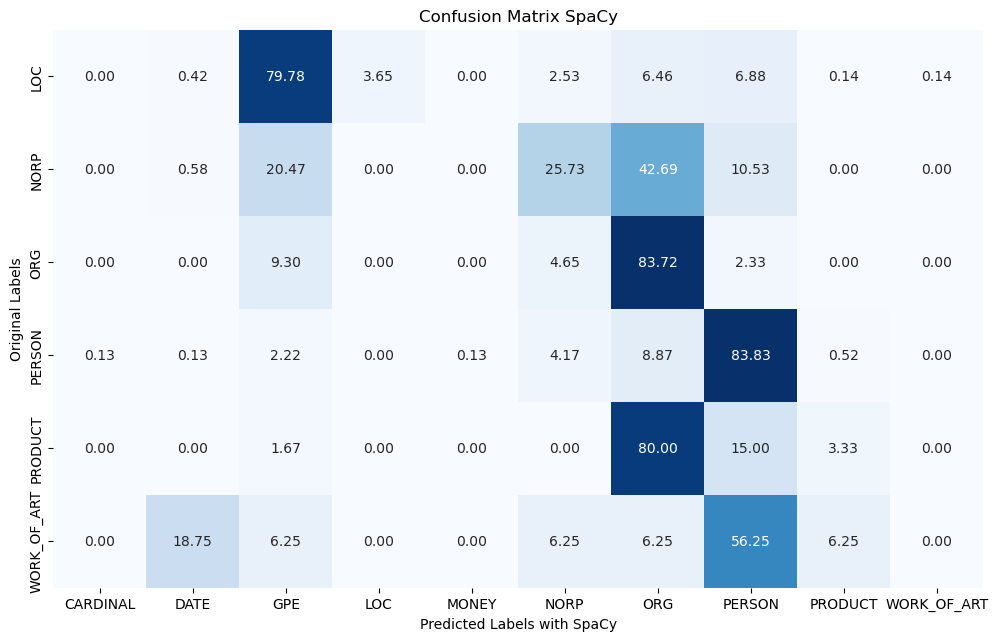

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizziamo la confusion matrix come heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cross_tab_percent, annot=True, fmt='.2f', cmap='Blues',
            cbar=False,  # Non mostrare la barra laterale delle scale
            square=True,  # Rendi quadrati i riquadri
            annot_kws={"size": 10})  # Dimensione del testo nelle annotazioni

plt.title('Confusion Matrix SpaCy')
plt.xlabel('Predicted Labels with SpaCy')
plt.ylabel('Original Labels')
plt.show()

From the examination of the confusion matrix, it is apparent that Spacy does not exhibit robust performance in accurately recognizing certain tags. Notably, instances of 'WORK OF ART' are frequently misclassified as 'PERSON', while 'LOC' is often confused with 'GPE'. Some SpaCy's labels as "Cardinal" and "Money" don't even appears in our original labels.

The LDA (Latent Dirichlet Allocation) is not performed since our analysis is token-based, which would yield poor results. However, we have conducted a comparison between SpaCy and our dataset, demonstrating that SpaCy is not very accurate in generating labeling similar to ours.

# Neural Network approach for the NLP use case

## LSTM for NER

The Neural Network approach in NLP encompasses leveraging deep learning architectures for various tasks such as text classification, sentiment analysis, and Named Entity Recognition (NER). It involves the utilization of neural networks to process and understand patterns within textual data. Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN), excel in sequence labeling tasks such as NER. These networks capture long-range dependencies in text data, crucial for accurately identifying and categorizing entities.

### Upper-case

**In the first model we will use words without pass them in lower-case.**

**Split the Data into Training and Test**

As a starting point, we preprocess and convert the dataset into the CoNLL format, essential for training a Named Entity Recognition model.

In [48]:
# Function to convert the DataFrame into a string in CoNLL format
def dataframe_to_conll(df):
    conll_data = ""
    for row in df.itertuples(index=False):
        conll_data += f"{row.Word} {row.IOB_Tag}\n"
    conll_data += "\n"
    return conll_data

# Convert DataFrames to strings in CoNLL format
conll_train_data = dataframe_to_conll(df_train)
conll_test_data = dataframe_to_conll(df_test)

# Function to write a string in CoNLL format to a file
def write_conll_file(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(data)

# Write strings in CoNLL format to files
write_conll_file(conll_train_data, 'train.txt')
write_conll_file(conll_test_data, 'test.txt')

In [49]:
# Function to load IOB-labeled data
def load_iob_data(file_path):
    raw_train = []
    ner_train = []
    current_sentence = {'raw': [], 'ner': []}

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

        for line in lines:
            if line.strip():  # Ignore empty lines
                word, iob_label = line.split()
                current_sentence['raw'].append(word)
                current_sentence['ner'].append(iob_label)
            else:
                if current_sentence['raw'] and current_sentence['ner']:
                    raw_train.append(current_sentence['raw'])
                    ner_train.append(current_sentence['ner'])
                    current_sentence = {'raw': [], 'ner': []}

    return raw_train, ner_train

In [50]:
# Exemple of using:
file_path_train = './train.txt'  
file_path_test = './test.txt'
raw_train, ner_train = load_iob_data(file_path_train)
raw_test, ner_test =  load_iob_data(file_path_test)

In [51]:
print(raw_train[0])
print(ner_train[0])


['@paulwalk', 'It', "'s", 'the', 'view', 'from', 'where', 'I', "'m", 'living', 'for', 'two', 'weeks', '.', 'Empire', 'State', 'Building', '=', 'ESB', '.', 'Pretty', 'bad', 'storm', 'here', 'last', 'evening', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-location', 'I-location', 'I-location', 'O', 'B-location', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


 Let's generate a set of unique output labels and proceed with tokenization, sequence creation, and index mapping:

In [52]:
def create_output_labels(ner_train):
    output_labels = set()

    for labels_per_sentence in ner_train:
        output_labels.update(labels_per_sentence)

    return output_labels

# Creating a set of unique labels
output_labels = create_output_labels(ner_train)
print(output_labels)

{'I-corporation', 'I-group', 'I-location', 'O', 'B-product', 'I-person', 'B-group', 'I-product', 'B-corporation', 'B-creative-work', 'B-person', 'I-creative-work', 'B-location'}


In the step below, we tokenize data in order to facilitate the implementation of language processing algorithms and reduce computational complexity.
In addition to each token we associate a numeric index.

In [179]:
# Tokenizer for tokenizing text data
token_tokenizer = Tokenizer() 
token_tokenizer.fit_on_texts(raw_train + raw_test)

# Generating sequences for training and testing text data
train_sequences = token_tokenizer.texts_to_sequences(raw_train)
test_sequences = token_tokenizer.texts_to_sequences(raw_test)

# Ordine fisso desiderato per le etichette
fixed_label_order = ['B-group', 'I-product', 'B-creative-work', 'B-location', 'I-location', 'B-product', 'I-person', 'I-creative-work', 'B-person', 'B-corporation', 'I-group', 'O', 'I-corporation']  # Sostituisci con le tue etichette effettive

# Mapping tags to indices and creating index-to-tag mapping
tag2idx = {tag: idx for idx, tag in enumerate(fixed_label_order)}
idx2tag = {idx: tag for tag, idx in tag2idx.items()}

# Converting NER sequences to sequences of indices using tag-to-index mapping
ner_train_sequences = [[tag2idx[tag] for tag in sentence] for sentence in ner_train]
ner_test_sequences = [[tag2idx[tag] for tag in sentence] for sentence in ner_test]

In [180]:
print(raw_test[5])
print(test_sequences[5])
for i in test_sequences[5]:
    print(f'{i} : {token_tokenizer.index_word[i]}')

['&', 'gt', ';', '*', 'Arrangements', 'are', 'in', 'place', 'to', 'carry', 'the', 'mortal', 'remains', 'of', 'the', 'martyrs', 'to', 'their', 'native', 'places', 'immediately', 'after', 'weather', 'becomes', 'clear', ',', 'Defence', 'Spokesman', 'Colonel', 'Rajesh', 'Kalia', 'said', '.']
[255, 436, 140, 92, 4479, 54, 12, 339, 5, 2484, 2, 4480, 1651, 14, 2, 4481, 5, 144, 2832, 1576, 2313, 80, 754, 2833, 1150, 3, 2834, 2077, 4482, 4483, 4484, 201, 1]
255 : &
436 : gt
140 : ;
92 : *
4479 : arrangements
54 : are
12 : in
339 : place
5 : to
2484 : carry
2 : the
4480 : mortal
1651 : remains
14 : of
2 : the
4481 : martyrs
5 : to
144 : their
2832 : native
1576 : places
2313 : immediately
80 : after
754 : weather
2833 : becomes
1150 : clear
3 : ,
2834 : defence
2077 : spokesman
4482 : colonel
4483 : rajesh
4484 : kalia
201 : said
1 : .


In [55]:
vocabulary_size = len(token_tokenizer.word_counts)
print(vocabulary_size)
# The number of standard words contained in the Tokenizer() function are: 16386

16386


In the next chunck we assign to each token a numeric IOB Tag.

In [181]:
print(raw_train[0])
print(ner_train_sequences[0])
for i in ner_train_sequences[0]:
    print(f'{i} : {idx2tag[i]}')

['@paulwalk', 'It', "'s", 'the', 'view', 'from', 'where', 'I', "'m", 'living', 'for', 'two', 'weeks', '.', 'Empire', 'State', 'Building', '=', 'ESB', '.', 'Pretty', 'bad', 'storm', 'here', 'last', 'evening', '.']
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 3, 4, 4, 11, 3, 11, 11, 11, 11, 11, 11, 11, 11]
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
3 : B-location
4 : I-location
4 : I-location
11 : O
3 : B-location
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O
11 : O


### Sequence Padding

This codes segment focuses on sequence length analysis, determining the maximum sequence length, and padding sequences for training and testing data.

In [182]:
# Calculating lengths of sequences in the training data and finding the longest sequence
sequence_len = np.array([len(s) for s in train_sequences])
longest_sequence = sequence_len.max()
print(f'Longest sequence: {longest_sequence}')

# Computing percentiles of sequence lengths for analysis
print([(str(p) + '%', np.percentile(sequence_len, p)) for p in range(75, 101, 5)])

Longest sequence: 41
[('75%', 24.0), ('80%', 26.0), ('85%', 27.0), ('90%', 28.0), ('95%', 30.0), ('100%', 41.0)]


We can see that the 95% of the sentences are composed of a maximum of 30 words while the 100% of the sentences are composed of a maximum of 41 words. Having this information, we decided to take as maximum sentence length a middle way of 35. 

Finally, for all sentences shorter than 35, we applied 'padding', which implies the addition of the -PAD- elements, classified as 'O'. While for sentences longer than 35 we applied 'truncating', where the words are eliminated after the thirty-fifth position.

In [183]:
# Defining the maximum sequence length
max_sequence_len = 35

# Padding/truncating sequences to the defined maximum length for both training and testing data
X_train = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='post', truncating='post')
X_test = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='post', truncating='post')

# Padding NER label sequences and converting them into categorical matrices for training and testing
Y_train = pad_sequences(ner_train_sequences, maxlen=max_sequence_len, value=tag2idx['O'], padding='post', truncating='post')
Y_test = pad_sequences(ner_test_sequences, maxlen=max_sequence_len, value=tag2idx['O'], padding='post', truncating='post')

Y_train = to_categorical(Y_train, num_classes=len(output_labels), dtype='int32')
Y_test = to_categorical(Y_test, num_classes=len(output_labels), dtype='int32')

In [184]:
print(X_train[0])
print(Y_train[0])

[2901   13   25    2 1391   56  190    6  372  694   15  237  277    1
 2115  695 1192  649 2902    1  284  313  762  121  117  696    1    0
    0    0    0    0    0    0    0]
[[0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0

The zeros in the output above represent not belonging to a particular label while the ones represent belonging to that label.

In [60]:
# Assigning the string 'PAD' to the zero index of the index_word dictionary
token_tokenizer.index_word[0] = '_PAD_'

In [61]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [62]:
print(X_train.shape)
print(Y_train.shape)

(3394, 35)
(3394, 35, 13)


Now our X_train array contains 3394 vectors 35 tokens long, while Y_train contains 3394 vectors containing 35 elements with a unique label number of 13.

## Build, train and evaluate an LSTM model

Bidirectional Long Short-Term Memory "BiLSTM" is a type of recurrent neural network that operates on sequential data, such as text. Unlike traditional LSTMs, a BiLSTM can analyze the sequence both forward and backward, thereby capturing information from both past and future elements in the sequence.

GloVe "Global Vectors for Word Representation" is a model of representation of words (word embedding) developed to capture the semantic relationships between words in a text. 
The goal of GloVe is to represent words in a vector space so that the semantic similarity between words is reflected by the distance between their vectors.
GloVe stresses that the frequency of co-occurrences is vital information and should not be “wasted ”as additional training examples.

In [64]:
proj_dir = "C:\\Users\\Elisabetta\\Desktop\\DATA ANALYTICS FOR BUSINESS\\SECONDO ANNO\\DATA VISUALIZATION AND TEXT MINING\\PROGETTO_VERO"
# Setting up GloVe embeddings and model configuration
USE_GLOVE = True
glove_matrix = None

if USE_GLOVE:
    # Path to GloVe embeddings file
    glove_embedding_path = os.path.join(proj_dir,'embeddings','glove.6B.100d.txt')
    embedding_dim = 100

    # Loading GloVe embeddings using the specified file path and dimensions
    glove_matrix = kerasutils.load_glove_embedding_matrix(glove_embedding_path, token_tokenizer.word_index, embedding_dim)


Found 400001 word vectors.


In [65]:
print(glove_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.33978999  0.20941     0.46348    ... -0.23394001  0.47297999
  -0.028803  ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 ...
 [ 0.19667    -0.68788999  0.18775    ... -0.68630999  0.036628
  -1.20200002]
 [ 0.39517    -0.80479002 -0.080143   ...  0.14645    -0.14991
   0.44789001]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


The embeddings matrix is a bi-dimensional data structure where each line represents one word of the vocabulary and each column represents the weights associated to that single word. In our case we set the embending size to 100.

In [66]:
# Creating a BiLSTM model with or without GloVe embeddings based on the 'USE_GLOVE' flag
model_glove_upper = kerasutils.create_paper_BiLSTM(vocabulary_size+1, max_sequence_len, len(output_labels),
                                 use_glove=USE_GLOVE, glove_matrix=glove_matrix)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 100)           1638700   
                                                                 
 dropout (Dropout)           (None, 35, 100)           0         
                                                                 
 bidirectional (Bidirection  (None, 35, 400)           481600    
 al)                                                             
                                                                 
 dense (Dense)               (None, 35, 13)            5213      
                                                                 
Total params: 2125513 (8.11 MB)
Trainable params: 2125513 (8.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# File path to save the best model weights during training
best_model_file = os.path.join(proj_dir,'models','lstm-conll-best-model.h5')

# Configuring model checkpoint to save the best model weights
checkpoint = ModelCheckpoint(
    best_model_file,
    save_weights_only=True,
    save_best_only=True
)

In [68]:
#Less aggressive Early Stopping
early_stopping_callback = EarlyStopping(monitor="loss", min_delta=0.01, patience=3, verbose=1, mode="auto", restore_best_weights=True)

In [69]:
%%time
# Setting the batch size for training
batch_size = 10

# Training the model_glove_upper on X_train and Y_train datasets
# with specified parameters: batch_size, epochs, verbosity, and callbacks
history = model_glove_upper.fit(
    X_train,                           # Training data - input sequences
    Y_train,                           # Training data - target labels
    batch_size=batch_size,             # Number of samples per gradient update
    epochs=50,                         # Number of training epochs
    verbose=2,                         # Verbosity mode: 0 (silent), 1 (progress bar), 2 (one line per epoch)
    callbacks=[checkpoint, early_stopping_callback]  # List of callbacks during training
)


Epoch 1/50
340/340 - 56s - loss: 0.3198 - accuracy: 0.9469 - precision: 0.9536 - recall: 0.9312 - 56s/epoch - 165ms/step
Epoch 2/50
340/340 - 33s - loss: 0.2133 - accuracy: 0.9563 - precision: 0.9639 - recall: 0.9474 - 33s/epoch - 98ms/step
Epoch 3/50
340/340 - 38s - loss: 0.1742 - accuracy: 0.9608 - precision: 0.9687 - recall: 0.9531 - 38s/epoch - 111ms/step
Epoch 4/50
340/340 - 19s - loss: 0.1508 - accuracy: 0.9638 - precision: 0.9718 - recall: 0.9569 - 19s/epoch - 56ms/step
Epoch 5/50
340/340 - 17s - loss: 0.1307 - accuracy: 0.9665 - precision: 0.9746 - recall: 0.9600 - 17s/epoch - 49ms/step
Epoch 6/50
340/340 - 17s - loss: 0.1153 - accuracy: 0.9691 - precision: 0.9770 - recall: 0.9636 - 17s/epoch - 50ms/step
Epoch 7/50
340/340 - 17s - loss: 0.0979 - accuracy: 0.9722 - precision: 0.9800 - recall: 0.9666 - 17s/epoch - 51ms/step
Epoch 8/50
340/340 - 18s - loss: 0.0880 - accuracy: 0.9756 - precision: 0.9817 - recall: 0.9706 - 18s/epoch - 52ms/step
Epoch 9/50
340/340 - 18s - loss: 0.078

In the code above, we train the machine learning model using the training set provided (X_train and Y_train) with the aim of using GloVe embeddings during the training. The epochs stop when we have minimized the loss.

In [70]:
kerasutils.print_model_memory_usage(batch_size, model_glove_upper)

Model size: 8.927 MB


In [71]:
print(f'Model latency in predictions: {modelutils.compute_prediction_latency(X_test, model_glove_upper):.3} s')

41/41 [==============================] - 4s 20ms/step
Model latency in predictions: 0.00246 s


The model latency in predictions represents the time taken by a model to make a prediction on new data once the model has been trained and is ready for use.

In [72]:
datasets = [('Training Set', X_train, Y_train), ('Test Set', X_test, Y_test)]

# Iterating through each dataset (Training Set and Test Set)
for title, X, Y in datasets:
    # Generating predictions using the model on the current dataset
    Y_pred = model_glove_upper.predict(X, batch_size=batch_size)
    
    # Extracting the most probable class index for each prediction
    Y_pred = np.array(np.argmax(Y_pred, axis=-1))
    Y = np.array(np.argmax(Y, axis=-1))
    
    # Removing sequence padding to use in subsequent code
    Y, Y_pred = kerasutils.remove_seq_padding1(X, Y, Y_pred)
    
    # Converting encoded labels to their literal representations
    let_y_true, let_y_pred = modelutils.from_encode_to_literal_labels(Y, Y_pred, idx2tag)
    
    print(title)
    print(classification_report(let_y_true, let_y_pred, digits=3))
    print('\n')


340/340 [==============================] - 6s 18ms/step
Training Set
               precision    recall  f1-score   support

  corporation      0.969     0.982     0.975       221
creative-work      0.796     0.893     0.842       140
        group      0.904     0.958     0.930       264
     location      0.951     0.958     0.955       548
       person      0.978     0.989     0.983       660
      product      0.941     0.901     0.921       142

    micro avg      0.942     0.963     0.952      1975
    macro avg      0.923     0.947     0.934      1975
 weighted avg      0.944     0.963     0.953      1975



129/129 [==============================] - 2s 16ms/step
Test Set
               precision    recall  f1-score   support

  corporation      0.111     0.091     0.100        66
creative-work      0.075     0.058     0.065       139
        group      0.257     0.176     0.209       159
     location      0.495     0.338     0.402       145
       person      0.562     0.388 

Comparing the true and predicted labels for each token in a specific sentence from the test set allows a detailed examination of the model's performance at the token level. We can immediately notice how the use of Glove does not allow us to accurately label tokens within our dataset.

In [73]:
i = 6
sentence = X_test[i]
y_pred = model_glove_upper.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_pred = y_pred[i]
y_true = np.argmax(Y_test, axis=-1)[i]
for idx in range(len(sentence)):
    print(f'{token_tokenizer.index_word[sentence[idx]]:15}  {idx2tag[y_true[idx]]:6} | {idx2tag[y_pred[idx]]}')

41/41 [==============================] - 1s 27ms/step
visuals          O      | O
of               O      | O
the              O      | O
avalanche        O      | O
site             O      | O
in               O      | O
gurez            B-location | B-location
sector           I-location | O
.                O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_

In the first column of label we have the true labels while in the second one we have the predicted labels.

As we said above for the sentences shorter than 35 tokens, the element -PAD- has been added and the 'O' label associated with it.

### Lower-case

We continue along the lines of the upper-case words in the following steps, doing the same work for the words in lower-case.

In [74]:
# Transforming the training data to lowercase
raw_train_lower = [[' '.join(word.lower().split()) for word in sentence] for sentence in raw_train]

# Transforming the test data to lowercase
raw_test_lower = [[' '.join(word.lower().split()) for word in sentence] for sentence in raw_test]

In [206]:
# Initializing a new Tokenizer for lowercase text
token_tokenizer_lower = Tokenizer()

# Fitting the tokenizer on concatenated lowercased training and test data
token_tokenizer_lower.fit_on_texts(raw_train_lower + raw_test_lower)

# Generating sequences for lowercased training and test data
train_sequences_lower = token_tokenizer_lower.texts_to_sequences(raw_train_lower)
test_sequences_lower = token_tokenizer_lower.texts_to_sequences(raw_test_lower)

# Ordine fisso desiderato per le etichette
fixed_label_order = ['B-group', 'I-product', 'B-creative-work', 'B-location', 'I-location', 'B-product', 'I-person', 'I-creative-work', 'B-person', 'B-corporation', 'I-group', 'O', 'I-corporation']  # Sostituisci con le tue etichette effettive

# Mapping tags to their corresponding indices for lowercase data
tag2idx_lower = {tag: idx for idx, tag in enumerate(fixed_label_order)}
idx2tag_lower = {idx: tag for tag, idx in tag2idx_lower.items()}

# Converting NER labels to indices for lowercase data
ner_train_sequences_lower = [[tag2idx_lower[tag] for tag in sentence] for sentence in ner_train]
ner_test_sequences_lower = [[tag2idx_lower[tag] for tag in sentence] for sentence in ner_test]

In [207]:
print(raw_test_lower[5])
print(test_sequences_lower[5])
for i in test_sequences_lower[5]:
    print(f'{i} : {token_tokenizer_lower.index_word[i]}')

['&', 'gt', ';', '*', 'arrangements', 'are', 'in', 'place', 'to', 'carry', 'the', 'mortal', 'remains', 'of', 'the', 'martyrs', 'to', 'their', 'native', 'places', 'immediately', 'after', 'weather', 'becomes', 'clear', ',', 'defence', 'spokesman', 'colonel', 'rajesh', 'kalia', 'said', '.']
[255, 436, 140, 92, 4479, 54, 12, 339, 5, 2484, 2, 4480, 1651, 14, 2, 4481, 5, 144, 2832, 1576, 2313, 80, 754, 2833, 1150, 3, 2834, 2077, 4482, 4483, 4484, 201, 1]
255 : &
436 : gt
140 : ;
92 : *
4479 : arrangements
54 : are
12 : in
339 : place
5 : to
2484 : carry
2 : the
4480 : mortal
1651 : remains
14 : of
2 : the
4481 : martyrs
5 : to
144 : their
2832 : native
1576 : places
2313 : immediately
80 : after
754 : weather
2833 : becomes
1150 : clear
3 : ,
2834 : defence
2077 : spokesman
4482 : colonel
4483 : rajesh
4484 : kalia
201 : said
1 : .


In [208]:
# Computing sequence lengths and analyzing statistics for lowercase sequences

# Calculating the length of each sequence in the lowercase training data
sequence_len_lower = np.array([len(s) for s in train_sequences_lower])

# Finding the length of the longest sequence in the lowercase training data
longest_sequence_lower = sequence_len_lower.max()
print(f'Longest sequence: {longest_sequence_lower}')

# Calculating percentiles for sequence lengths in the lowercase training data
print([(str(p) + '%', np.percentile(sequence_len_lower, p)) for p in range(75,101, 5)])

Longest sequence: 41
[('75%', 24.0), ('80%', 26.0), ('85%', 27.0), ('90%', 28.0), ('95%', 30.0), ('100%', 41.0)]


In [209]:
# Setting the maximum sequence length for lowercase sequences
max_sequence_len_lower = 35

# Padding and truncating lowercase training and test sequences to a maximum length
X_train_lower = pad_sequences(train_sequences_lower, maxlen=max_sequence_len_lower, padding='post', truncating='post')
X_test_lower = pad_sequences(test_sequences_lower, maxlen=max_sequence_len_lower, padding='post', truncating='post')

# Padding lowercase NER sequences and converting them into categorical format
Y_train_lower = pad_sequences(ner_train_sequences_lower, maxlen=max_sequence_len_lower, value=tag2idx_lower['O'], padding='post', truncating='post')
Y_test_lower = pad_sequences(ner_test_sequences_lower, maxlen=max_sequence_len_lower, value=tag2idx_lower['O'], padding='post', truncating='post')

Y_train_lower = to_categorical(Y_train_lower, num_classes=len(output_labels), dtype='int32')
Y_test_lower = to_categorical(Y_test_lower, num_classes=len(output_labels), dtype='int32')

print(X_train_lower[0])
print(Y_train_lower[0])  


[2901   13   25    2 1391   56  190    6  372  694   15  237  277    1
 2115  695 1192  649 2902    1  284  313  762  121  117  696    1    0
    0    0    0    0    0    0    0]
[[0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0

Following the path of the upper-case:

In [79]:
token_tokenizer_lower.index_word[0] = '_PAD_'

In [80]:
X_train_lower = np.array(X_train_lower)
Y_train_lower = np.array(Y_train_lower)
X_test_lower = np.array(X_test_lower)
Y_test_lower = np.array(Y_test_lower)

print(X_train_lower.shape)
print(Y_train_lower.shape)

(3394, 35)
(3394, 35, 13)


In [81]:
USE_GLOVE=True

In [82]:
glove_matrix=None
if USE_GLOVE:
    glove_embedding_path = os.path.join(proj_dir,'embeddings','glove.6B.100d.txt')
    embedding_dim = 100
    glove_matrix = kerasutils.load_glove_embedding_matrix(glove_embedding_path, token_tokenizer_lower.word_index, embedding_dim)

Found 400001 word vectors.


In [83]:
print(glove_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.33978999  0.20941     0.46348    ... -0.23394001  0.47297999
  -0.028803  ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 ...
 [ 0.19667    -0.68788999  0.18775    ... -0.68630999  0.036628
  -1.20200002]
 [ 0.39517    -0.80479002 -0.080143   ...  0.14645    -0.14991
   0.44789001]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [84]:
vocabulary_size_lower = len(token_tokenizer_lower.word_counts)
print(vocabulary_size_lower)

16386


In [85]:
model_glove_lower = kerasutils.create_paper_BiLSTM(vocabulary_size_lower+1, max_sequence_len_lower, len(output_labels),
                                 use_glove=USE_GLOVE, glove_matrix=glove_matrix)

best_model_file_lower = './lstm-conll-best-model.h5'
checkpoint_lower = ModelCheckpoint(
    best_model_file_lower,
    save_weights_only=True,
    save_best_only=True
)

# More aggressive Early Stopping
# early_stopping_callback = EarlyStopping(monitor="val_loss", min_delta=0.01, patience=1, verbose=1, mode="auto", restore_best_weights=False)

#Less aggressive Early Stopping
early_stopping_callback_lower = EarlyStopping(monitor="loss", min_delta=0.01, patience=3, verbose=1, mode="auto", restore_best_weights=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 100)           1638700   
                                                                 
 dropout_1 (Dropout)         (None, 35, 100)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 35, 400)           481600    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 35, 13)            5213      
                                                                 
Total params: 2125513 (8.11 MB)
Trainable params: 2125513 (8.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
%%time
batch_size_lower = 10
history_lower = model_glove_lower.fit(X_train_lower, 
          Y_train_lower, 
          batch_size=batch_size_lower, 
          epochs=50,
          verbose=2,
          callbacks=[checkpoint_lower, early_stopping_callback_lower],
         )

Epoch 1/50
340/340 - 33s - loss: 0.3131 - accuracy: 0.9466 - precision_1: 0.9538 - recall_1: 0.9297 - 33s/epoch - 97ms/step
Epoch 2/50
340/340 - 25s - loss: 0.2158 - accuracy: 0.9559 - precision_1: 0.9632 - recall_1: 0.9470 - 25s/epoch - 72ms/step
Epoch 3/50
340/340 - 25s - loss: 0.1801 - accuracy: 0.9598 - precision_1: 0.9677 - recall_1: 0.9526 - 25s/epoch - 72ms/step
Epoch 4/50
340/340 - 26s - loss: 0.1502 - accuracy: 0.9636 - precision_1: 0.9709 - recall_1: 0.9573 - 26s/epoch - 76ms/step
Epoch 5/50
340/340 - 26s - loss: 0.1322 - accuracy: 0.9670 - precision_1: 0.9746 - recall_1: 0.9605 - 26s/epoch - 76ms/step
Epoch 6/50
340/340 - 25s - loss: 0.1144 - accuracy: 0.9690 - precision_1: 0.9770 - recall_1: 0.9628 - 25s/epoch - 74ms/step
Epoch 7/50
340/340 - 25s - loss: 0.1000 - accuracy: 0.9722 - precision_1: 0.9799 - recall_1: 0.9666 - 25s/epoch - 73ms/step
Epoch 8/50
340/340 - 26s - loss: 0.0895 - accuracy: 0.9748 - precision_1: 0.9817 - recall_1: 0.9697 - 26s/epoch - 77ms/step
Epoch 9/

In [87]:
kerasutils.print_model_memory_usage(batch_size_lower, model_glove_lower)

Model size: 8.927 MB


In [88]:
print(f'Model latency in predictions: {modelutils.compute_prediction_latency(X_test_lower, model_glove_lower):.3} s')

41/41 [==============================] - 4s 20ms/step
Model latency in predictions: 0.00205 s


In [89]:
datasets_lower = [('Training Set', X_train_lower, Y_train_lower), ('Test Set', X_test_lower, Y_test_lower)]

for title, X_lower, Y_lower in datasets_lower:
    Y_pred_lower = model_glove_lower.predict(X_lower, batch_size=batch_size_lower)
    Y_pred_lower = np.array(np.argmax(Y_pred_lower, axis=-1))
    Y_lower = np.array(np.argmax(Y_lower, axis=-1))
    Y_lower, Y_pred_lower = kerasutils.remove_seq_padding1(X_lower, Y_lower, Y_pred_lower) # Create X and Y without padding so we can use in the code below
    let_y_true_lower, let_y_pred_lower = modelutils.from_encode_to_literal_labels(Y_lower, Y_pred_lower, idx2tag_lower)
    
    print(title)
    print(classification_report(let_y_true_lower, let_y_pred_lower, digits=3))
    print('\n')

340/340 [==============================] - 7s 19ms/step
Training Set
               precision    recall  f1-score   support

  corporation      0.940     0.986     0.962       221
creative-work      0.878     0.871     0.875       140
        group      0.947     0.955     0.951       264
     location      0.950     0.964     0.957       548
       person      0.976     0.983     0.980       660
      product      0.906     0.887     0.897       142

    micro avg      0.949     0.959     0.954      1975
    macro avg      0.933     0.941     0.937      1975
 weighted avg      0.949     0.959     0.954      1975



129/129 [==============================] - 2s 13ms/step
Test Set
               precision    recall  f1-score   support

  corporation      0.109     0.106     0.108        66
creative-work      0.174     0.058     0.086       139
        group      0.288     0.107     0.156       159
     location      0.359     0.359     0.359       145
       person      0.544     0.384 

In [90]:
i = 6
sentence_lower = X_test_lower[i]
y_pred_lower = model_glove_lower.predict(X_test_lower)
y_pred_lower = np.argmax(y_pred_lower, axis=-1)
y_pred_lower = y_pred_lower[i]
y_true_lower = np.argmax(Y_test_lower, axis=-1)[i]
for idx in range(len(sentence_lower)):
    print(f'{token_tokenizer_lower.index_word[sentence_lower[idx]]:15}  {idx2tag_lower[y_true_lower[idx]]:6} | {idx2tag_lower[y_pred_lower[idx]]}')

41/41 [==============================] - 1s 23ms/step
visuals          O      | O
of               O      | O
the              O      | O
avalanche        O      | O
site             O      | O
in               O      | O
gurez            B-location | B-location
sector           I-location | O
.                O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_            O      | O
_PAD_

For a deeper analysis we made a comparison between lower-case and upper-case. After changing the quantity of the epochs several times, we noticed that, from the point of view of accuracy, the upper-case is slightly better than the lower-case. 
This is probably because the LSTM takes individual tokens into account, so capital letters can act as an additional information.

### Confusion matrix LSTM with GloVe

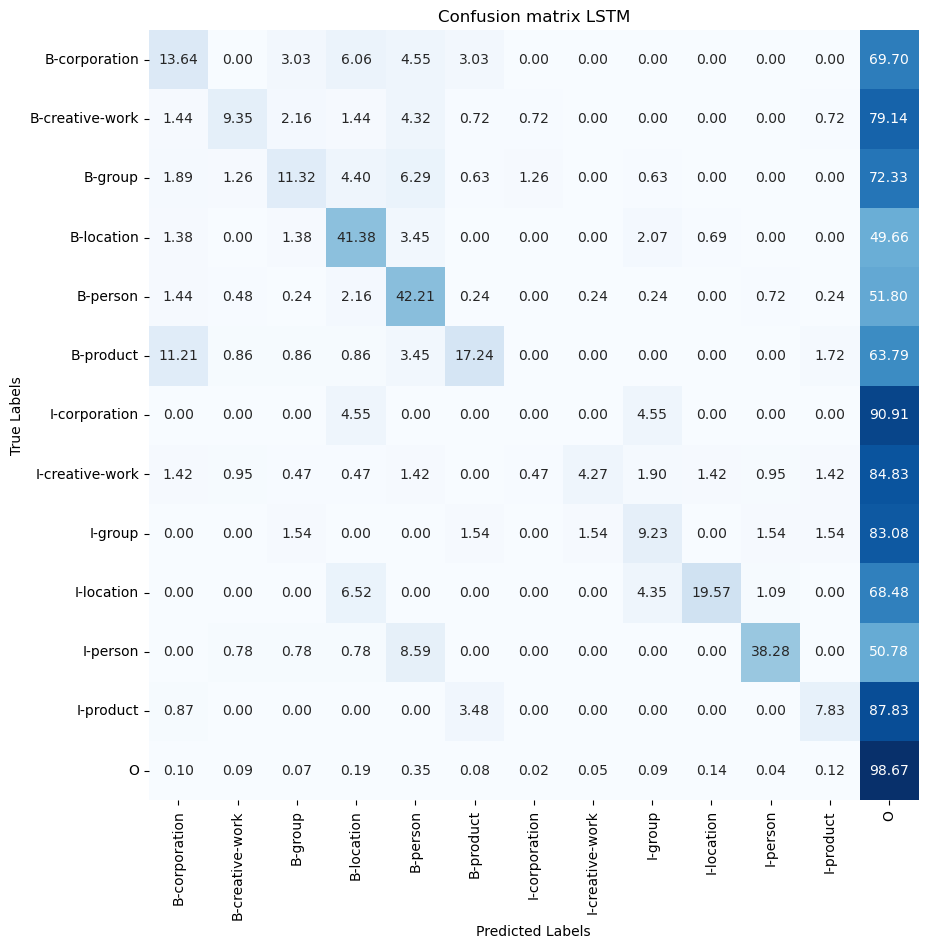

In [202]:
from itertools import chain

# Supponendo che let_y_true_lower sia una lista di liste
let_y_true_flat = list(chain.from_iterable(let_y_true_lower))
let_y_pred_flat = list(chain.from_iterable(let_y_pred_lower))

# Supponendo che y_true_lower e y_pred_lower siano liste di etichette semplici
df_etichette = pd.DataFrame({'True Labels': let_y_true_flat, 'Predicted Labels': let_y_pred_flat})

# Calcoliamo la tabella delle percentuali di etichettamento
cross_tab_lstm = pd.crosstab(df_etichette['True Labels'], df_etichette['Predicted Labels'], normalize='index') * 100

# Visualizziamo la tabella delle percentuali
#print("Tabella delle Percentuali:")
#print(cross_tab_lstm)

# Visualizziamo la tabella delle percentuali come heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cross_tab_lstm, annot=True, fmt='.2f', cmap='Blues',
            cbar=False, square=True, annot_kws={"size": 10})

plt.title('Confusion matrix LSTM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

We can see that always the LSTM model predicts the tag with the 'O'. This could be beacuse our dataset is heavily imbalanced (the 'O' tags appears in the 89% of our data). Some labels like B-location, B-person and I-person are predicted quite well, since around 40% of them present the corresponding right predicted label.

# Transformer Based Approach for the NLP use case

## BERT-Bidirectional Encorder Representation for Trasformers

BERT is a pre-trained machine learning model that utilizes an encoder to create bidirectional representations of words. The bidirectional capability comprehends the context of words not only before but also after a given word, allowing a better understanding of text meaning. In the real world of Natural Language Processing, BERT finds wide application in various tasks such as text classification, Named Entity Recognition, sentiment analysis, and text generation. In our case its bidirectional nature aids in recognizing entities based on their contextual usage, enhancing the accuracy of NER tasks.

In [93]:
from utils import *
!pip install bertviz
!pip install transformers
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show
!pip install datasets 
from datasets import Dataset, DatasetDict
import pandas as pd
from itertools import chain
import torch
from transformers import AutoModel
import numpy as np
from sklearn.dummy import DummyClassifier

The "AutoTokenizer" from the "transformers" library enables automatic tokenization, the "BertModel" from "bertviz.transformers_neuron_view" represents the BERT model for analysis, and the "show" function from "bertviz.neuron_view" that facilitates visualization.

We now create a Dataset from dictionaries using as texts 'raw_train' and 'raw_test' and using as labels the numeric labels we obtained before. The Dataset format for training the DistilBert model requires numeric format for labels and not string format (as the IOB-tags).

In [186]:
# Creating datasets from dictionaries containing training, test, and validation data
train_dataset_bert = Dataset.from_dict({"text": raw_train, "label": ner_train_sequences})
test_dataset_bert = Dataset.from_dict({"text": raw_test, "label": ner_test_sequences})
validation_dataset_bert = Dataset.from_dict({"text": raw_test, "label": ner_test_sequences}) 

In [187]:
# Combining datasets into a DatasetDict
dataset_dict = DatasetDict({
    "train": train_dataset_bert,
    "validation": validation_dataset_bert,
    "test": test_dataset_bert
})
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3394
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1287
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1287
    })
})

We created the validation set as a copy of the test set in order not to have an unbalanced test dataset with respect to the previous cases. Since the training set and the test set remain exactly the same, we should be able to compare the results obtained from all of them.

In [188]:
# Accessing the training dataset from the DatasetDict
train_ds_bert = dataset_dict["train"]
train_ds_bert

Dataset({
    features: ['text', 'label'],
    num_rows: 3394
})

In [191]:
# Retrieving information about the features in the train_ds_bert dataset.
train_ds_bert.features

{'text': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'label': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [192]:
print(train_ds_bert[:3])

{'text': [['@paulwalk', 'It', "'s", 'the', 'view', 'from', 'where', 'I', "'m", 'living', 'for', 'two', 'weeks', '.', 'Empire', 'State', 'Building', '=', 'ESB', '.', 'Pretty', 'bad', 'storm', 'here', 'last', 'evening', '.'], ['From', 'Green', 'Newsfeed', ':', 'AHFA', 'extends', 'deadline', 'for', 'Sage', 'Award', 'to', 'Nov', '.', '5', 'http://tinyurl.com/24agj38'], ['Pxleyes', 'Top', '50', 'Photography', 'Contest', 'Pictures', 'of', 'August', '2010', '...', 'http://bit.ly/bgCyZ0', '#photography']], 'label': [[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 3, 4, 4, 11, 3, 11, 11, 11, 11, 11, 11, 11, 11], [11, 11, 11, 11, 0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]]}


As we can see from above, the dataset we are managing is in the format of a list of lists. This appears to be a problem when we are dealing with the training of a DistilBert model since it requires a single list as input. 

In [193]:
# Settting the format of the dataset_dict to Pandas and retrieving the training dataset as a Pandas DataFrame.
dataset_dict.set_format(type="pandas")
df_bert = dataset_dict["train"][:]
df_bert.head()

text  \
0  [@paulwalk, It, 's, the, view, from, where, I,...   
1  [From, Green, Newsfeed, :, AHFA, extends, dead...   
2  [Pxleyes, Top, 50, Photography, Contest, Pictu...   
3     [today, is, my, last, day, at, the, office, .]   
4  [4Dbling, 's, place, til, monday, ,, party, pa...   

                                               label  
0  [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...  
1  [11, 11, 11, 11, 0, 11, 11, 11, 11, 11, 11, 11...  
2    [9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]  
3               [11, 11, 11, 11, 11, 11, 11, 11, 11]  
4    [8, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [194]:
# Resetting the format of the dataset_dict to the default format.
dataset_dict.reset_format()

We now define a function named flatten_lists that 'flat' a list of lists in a single list and we apply this function to all the train, test and validation dataframes. After that we convert these DataFrames into Dataset objects.

In [205]:
# This function flattens the text and label lists in the dataset.
def flatten_lists(dataset):
    # Flatten text and label lists
    flat_texts = list(chain.from_iterable(dataset["text"]))
    flat_labels = list(chain.from_iterable(dataset["label"]))
    return {"text": flat_texts, "label": flat_labels}

# Creating new datasets for train, test, and validation by flattening the lists
flat_train = flatten_lists(dataset_dict["train"])
flat_test = flatten_lists(dataset_dict["test"])
flat_valid = flatten_lists(dataset_dict["validation"])

In [105]:
# Converting dictionaries to DataFrames
df_train_bert = pd.DataFrame(flat_train)
df_test_bert = pd.DataFrame(flat_test)
df_valid_bert = pd.DataFrame(flat_valid)

print("Train DataFrame:")
print(df_train_bert.head())

print("\nTest DataFrame:")
print(df_test_bert.head())

print("\nValidation DataFrame:")
print(df_valid_bert.head())

Train DataFrame:
        text  label
0  @paulwalk      3
1         It      3
2         's      3
3        the      3
4       view      3

Test DataFrame:
  text  label
0    &      3
1   gt      3
2    ;      3
3    *      3
4  The      3

Validation DataFrame:
  text  label
0    &      3
1   gt      3
2    ;      3
3    *      3
4  The      3


In [106]:
# Converting DataFrames to Dataset objects
dataset_train_bert = Dataset.from_pandas(df_train_bert)
dataset_test_bert = Dataset.from_pandas(df_test_bert)
dataset_valid_bert = Dataset.from_pandas(df_valid_bert)

# Creating a new DatasetDict
dataset_dict_bert = DatasetDict({
    "train": dataset_train_bert,
    "test": dataset_test_bert,
    "validation": dataset_valid_bert
})

# Now you can use dataset_dict as needed
print(dataset_dict_bert)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 62730
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 23394
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 23394
    })
})


### Training a Text Classifier

We freeze the weights during training and use the hidden states as features for the classifier. We use DistilBert as the pretrained model since it is the fastest, smallest and cheaper model of Bert and it doesn't require a GPU to manage it.

In [107]:
# Setting the model checkpoint for the DistilBERT model
model_ckpt = "distilbert-base-uncased"

# Loading the tokenizer for the specified model checkpoint
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [108]:
def tokenize(batch):
    # Tokenize the input text batch using the loaded tokenizer
    return tokenizer(batch["text"], padding=True, truncation=True)


In [109]:
dataset_dict_bert["train"][:2]

{'text': ['@paulwalk', 'It'], 'label': [3, 3]}

We now tokenize our train dataset printing all the input ids and the attention masks of the first two tokens. As we can see from the table below, the special tokens such as CLS (that defines the beginning of a token or a sentence), SEP (that defines the end of a token or sentence) and PAD (that is added in case of padding) all have special indexes (101 for CLS, 102 for SEP and 0 for PAD).

In [110]:
print(tokenize(dataset_dict_bert["train"][:2]))

{'input_ids': [[101, 1030, 2703, 17122, 102], [101, 2009, 102, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 0, 0]]}


In [111]:
# hide input
# Special tokens and their IDs
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df_bert = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df_bert.T

0      1      2      3       4
Special Token     [PAD]  [UNK]  [CLS]  [SEP]  [MASK]
Special Token ID      0    100    101    102     103

In addition to returning the encoded tweets as `input_ids`, the tokenizer returns a list of `attention_mask` arrays. This is because we do not want the model to get confused by the additional padding tokens: the attention mask allows the model to ignore the padded parts of the input.
We now apply the map() function that is useful to tokenize all the text in our dataset. The "batched = True" part means that the tokenization is applied by batch level (tokenization applied on more elements of the dataset simultaneously) making this computationally more efficient. The batch size is not defined so the default value equal to 1000 is applied.

In [112]:
# hide_output
# Encode the datasets using the tokenizer
model_bert_encoded = dataset_dict_bert.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/62730 [00:00<?, ? examples/s]

Map:   0%|          | 0/23394 [00:00<?, ? examples/s]

Map:   0%|          | 0/23394 [00:00<?, ? examples/s]

In [113]:
print(model_bert_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


We will use another convenient auto class `AutoModel` that has a `from_pretrained()` method to load the weights of a pretrained model. The distilbert_base_uncased is a small implementation of BERT and is trained on English-language texts in lowercase letters. In `model_AutoModel` we load the pre-added weights of the specified model. 

In [114]:
# hide_output
# Loading the pre-trained DistilBERT model and assigning it to the available device (CPU or GPU)
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_AutoModel = AutoModel.from_pretrained(model_ckpt).to(device)

The model is now ready to be used for natural language processing (NLP) tasks.

In [115]:
# Tokenizing the input text using the tokenizer and generating input tensors
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


The code below performs inference with the pre-added model (passing it the inputs obtained from the all text) and prints the results obtained from the inference.

In [116]:
# Moving input tensors to the specified device (CPU or GPU)
inputs = {k: v.to(device) for k, v in inputs.items()}

# Performing inference using the model on the input tensors
with torch.no_grad():
    outputs = model_AutoModel(**inputs)

print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


The function `.size()` returns the size of this representation, which is the number of sentences in the data group, the number of words (or tokens) in each sentence, and the size of the representation for each word. This code gives an idea of how the model is handling input data during inference.

In [117]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

The function `extract_hidden_states()` asks the model to read a group of tokens, takes the important information that the model has learned and returns it so that it can be used for other things, such as making predictions based on that data. In this case  it extracts the hidden representation corresponding to the [CLS] token (which often represents the beginning of a text; in this case represents the beginning of a token) for each example in the data.

In [118]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model_AutoModel(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [119]:
# Setting the format of the encoded BERT model to torch tensors and specify the columns to include
model_bert_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])


In [119]:
#hide_output
# Apply the 'extract_hidden_states' function to the BERT encoded dataset to retrieve the hidden states for each token
#model_bert_hidden = model_bert_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/62730 [00:00<?, ? examples/s]

Map:   0%|          | 0/23394 [00:00<?, ? examples/s]

Map:   0%|          | 0/23394 [00:00<?, ? examples/s]

In [120]:
# Specifying the path to save the model and tokenizer
#path_to_save = "/Users/batti/Desktop/Cattolica/Data_Visualization/Assignment_datati/model_AutoModel"

# Save the model and tokenizer
#model_AutoModel.save_pretrained(path_to_save)
#tokenizer.save_pretrained(path_to_save)

('/Users/batti/Desktop/Cattolica/Data_Visualization/Assignment_datati/model_AutoModel/tokenizer_config.json',
 '/Users/batti/Desktop/Cattolica/Data_Visualization/Assignment_datati/model_AutoModel/special_tokens_map.json',
 '/Users/batti/Desktop/Cattolica/Data_Visualization/Assignment_datati/model_AutoModel/vocab.txt',
 '/Users/batti/Desktop/Cattolica/Data_Visualization/Assignment_datati/model_AutoModel/added_tokens.json',
 '/Users/batti/Desktop/Cattolica/Data_Visualization/Assignment_datati/model_AutoModel/tokenizer.json')

In [121]:
# Saving the tensors to disk using PyTorch's torch.save function
#torch.save(model_bert_hidden["train"], 'train_tensors.pth')


In [122]:
#model_bert_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [123]:
# Extracting hidden states for training and validation datasets from the BERT model representations
#X_train_bert = np.array(model_bert_hidden["train"]["hidden_state"])
#X_valid_bert = np.array(model_bert_hidden["validation"]["hidden_state"])

# Extracting labels for training and validation datasets
#y_train_bert = np.array(model_bert_hidden["train"]["label"])
#y_valid_bert = np.array(model_bert_hidden["validation"]["label"])

#X_train_bert.shape, X_valid_bert.shape


((62730, 768), (23394, 768))

In [ ]:
import numpy as np

# Salvataggio delle variabili per il bert 
#np.save('X_train_bert.npy', X_train_bert)
#np.save('X_valid_bert.npy', X_valid_bert)
#np.save('y_train_bert.npy', y_train_bert)
#np.save('y_valid_bert.npy', y_valid_bert)

We saved all the hidden states obtained with the model_bert_hidden both for the training set and the validation set. We now upload them in order to be able to compare them with the Logistic Regression and the Dummy Classifier without running the model_bert_hidden all the times.

In [120]:
# Caricamento delle variabili
X_train_bert = np.load('X_train_bert.npy')
X_valid_bert = np.load('X_valid_bert.npy')
y_train_bert = np.load('y_train_bert.npy')
y_valid_bert = np.load('y_valid_bert.npy')

# Puoi quindi caricarli successivamente utilizzando le funzioni np.load

### Training a simple classifier

We now use the hidden states to train a Logistic Regression model and a Dummy Classifier using Scikit-Learn. Both are base models so they don't require a GPU.

In [197]:
#hide_output
# We increase `max_iter` to guarantee convergence 
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=300)
lr_clf.fit(X_train_bert, y_train_bert)
lr_clf.score(X_valid_bert, y_valid_bert)

C:\Users\Elisabetta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9327177908865522

In [198]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_bert, y_train_bert)
dummy_clf.score(X_valid_bert, y_valid_bert)

0.9256219543472686

As we can see from above the Logistic Regression and the Dummy classifier both have a high accuracy in predicting the labels of our DistilBert model. This is due to the fact that our dataset is completely unbalanced, containing 89% of 'O' tags. Logistic regression is designed to model the probability of belonging to a class. 

Dummy Classifier is a classifier model that makes predictions without trying to find patterns in the data. The default model essentially looks at what label is more frequent in the training dataset and makes predictions based on that label. Since we have a so unbalanced class, these two models present a good level of accuracy because in just taking into consideration the 'O' class we can label correctly the 89% of our dataset. 

In [199]:
labels = dataset_dict_bert["train"].features["label"]

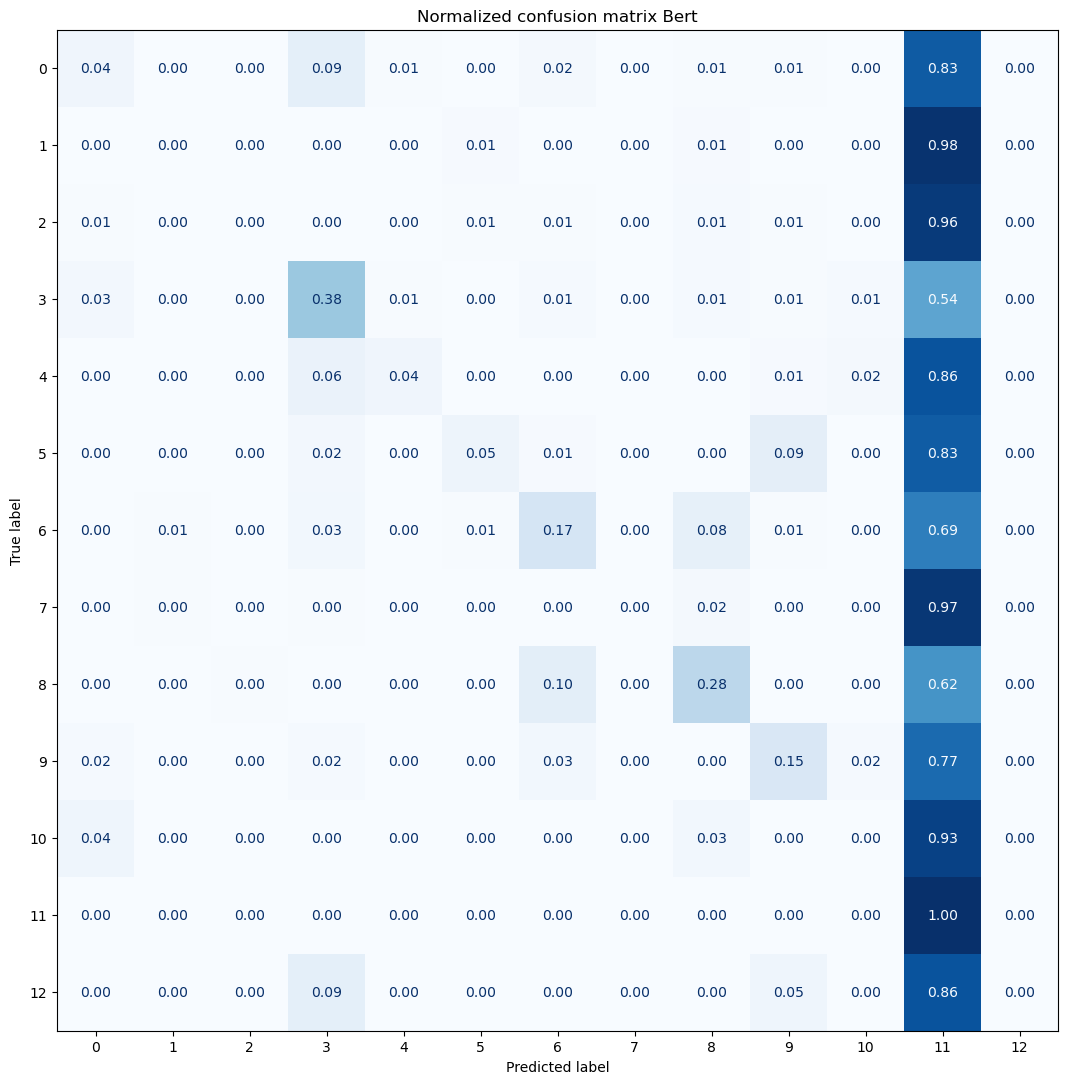

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(13, 13))

    # Convert labels to a list explicitly
    labels = list(set(y_true))  # Assuming y_true contains your label values

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)

    plt.title("Normalized confusion matrix Bert")
    plt.show()

# Example usage
y_preds = lr_clf.predict(X_valid_bert)
plot_confusion_matrix(y_preds, y_valid_bert)

# Perchè da noi le "O" sono rappresentate come 11

The confusion matrix above shows exactly what we state previously: the model predicts most of the words as 'O' tags, corresponding to numeric label 11. Despite that, we can see that labels number 3, corresponding to 'B-location', is predicted quite well. All the other labels are mostly predicted as 'O' tags.

## Comparison on models' accuracies

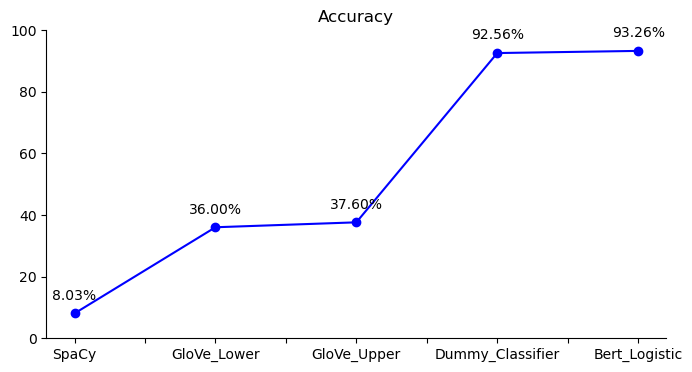

In [211]:
import pandas as pd
from matplotlib import pyplot as plt

# Collect accuracy scores into a list
accuracies = [
    8.03,
    36.00,
    37.60,
    92.56, 
    93.26,
]

# Create a DataFrame with only the accuracy column
results_df = pd.DataFrame({"Accuracy": accuracies}, index=["SpaCy", "GloVe_Lower", "GloVe_Upper", "Dummy_Classifier", "Bert_Logistic"])

# Plot the data
ax = results_df['Accuracy'].plot(kind='line', figsize=(8, 4), marker='o', color='b', title='Accuracy')

# Add data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.2f}%', (i, txt), textcoords="offset points", xytext=(0,10), ha='center')

# Set y-axis limit to 100
ax.set_ylim([0, 100])

# Remove top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()

From this graph we can say that the model with the higher accuracy is the Bert one compared with logistic regression.

# Results

After completing the initial phase of data preparation and cleaning, we proceeded with a detailed graphical analysis to gain a comprehensive understanding of variable distributions and obtain general insights into our text corpus.

Subsequently, we conducted a comparison between the IOB tags in our text and those generated by SpaCy. Despite initial challenges arising from differences in SpaCy's labeling methodology, we demonstrated that SpaCy's labels yielded suboptimal results in entity recognition. This discrepancy may stem from the fact that SpaCy employs a labeling scheme that differs from that of our dataset.

After this, we developed an LSTM model for named entity recognition (NER) in two distinct cases: in the first instance, we utilized the text without converting it to lower-case, while in the second case, we transformed the text to lower-case. We observed that the performance of the two models is quite similar, with a slight improvement when using upper-case. This enhancement may be attributed to the fact that upper-case letters can at times assist the model in recognizing the correct labels more effectively.

Finally, we implemented a DistilBERT model with hidden states and compared it with logistic regression and dummy classifier models. We observed a high level of accuracy in the DistilBERT model, highlighting its remarkable predictive capabilities.

In conclusion, we can declare that the BERT model proved to be the most effective, exhibiting higher accuracy compared to other models and achieving superior precision in labeling words for our purposes.